In [2]:
#to plot the heatmap for all the stations
#df1 = Jagiellońska, df2 = Królowej Jadwigi, df3 = Olszankowa, df4 = Zegrzyńska
#Polskiej Organizacji Wojskowej = 2019 data missing

import pandas as pd
df1 = pd.read_csv("./Jagiellońska/2019/2019-Daily(Jan-Dec).csv")
df2 = pd.read_csv("./Królowej Jadwigi/2019/Airly-report-2019-01-01-2019-12-31.csv")
df3 = pd.read_csv("./Olszankowa/2019/Airly-report-2019-01-01-2019-12-31.csv")
df4 = pd.read_csv("./Zegrzyńska/2019/Airly-report-2019-01-01-2019-12-31.csv")



In [3]:
#splitting the columns
new1 = df1["From;To;ID 2851 - PM2.5"].str.split(';', 2, expand = True)
#print(new1)
new2 = df2["From;To;ID 2872 - PM2.5"].str.split(';', 2, expand = True)
#print(new2)
new3 = df3["From;To;ID 6436 - PM2.5"].str.split(';', 2, expand = True)
#print(new3)
new4 = df4["From;To;ID 6437 - PM2.5"].str.split(';', 2, expand = True)
#print(new4)

df1["Date"] = new1[0]
df1["PM2.5"] = new1[2]
df2["Date"] = new2[0]
df2["PM2.5"] = new2[2]
df3["Date"] = new3[0]
df3["PM2.5"] = new3[2]
df4["Date"] = new4[0]
df4["PM2.5"] = new4[2]

#adding the PM2.5 values to different lists
PM1 = []
PM2 = []
PM3 = []
PM4 = []

PM1 = df1["PM2.5"].str.replace('"', '')
PM2 = df2["PM2.5"].str.replace('"', '')
PM3 = df3["PM2.5"].str.replace('"', '')
PM4 = df4["PM2.5"].str.replace('"', '')

#print(PM1)
# print(PM2)

#converting the PM2.5 conc values to integer
for i in range(0,len(PM1)):
    PM1[i] = int(PM1[i])
for i in range(0,len(PM2)):
    PM2[i] = int(PM2[i])
for i in range(0,len(PM3)):
    PM3[i] = int(PM3[i])
for i in range(0,len(PM4)):
    if PM4[i] != '':
        PM4[i] = int(PM4[i])
    else:
        PM4[i] = 0


# print(PM1)
# print(PM2)
# print(PM3)
# print(PM4)

#adding the dates to different lists

Date1 = []
Date2 = []
Date3 = []
Date4 = []

Date1 = df1["Date"]
Date2 = df2["Date"]
Date3 = df3["Date"]
Date4 = df4["Date"]

#print(Date1)


#removing the year from the date

Date1x = []
Date2x = []
Date3x = []
Date4x = []

for j in range(0,len(Date1)):
    abc = Date1[j].replace("/2019", "")
    Date1x.append(abc)

for j in range(0,len(Date2)):
    abc = Date2[j].replace("/2019", "")
    Date2x.append(abc)

for j in range(0,len(Date3)):
    abc = Date3[j].replace("/2019", "")
    Date3x.append(abc)
    
for j in range(0,len(Date4)):
    abc = Date4[j].replace("/2019", "")
    Date4x.append(abc)
    
#print(Date1x)

In [4]:
#separate out the different months for each station 

jandate1x = []
for x in Date1x:
    if x[3:5] == "01":
        jandate1x.append(x)

print(jandate1x)

pm1jan = []
for x in range(0,len(jandate1x)):
    pm1jan.append(PM1[x])
print(pm1jan)

pm2jan = []
for x in range(0,len(jandate1x)):
    pm2jan.append(PM2[x])
print(pm2jan)

pm3jan = []
for x in range(0,len(jandate1x)):
    pm3jan.append(PM3[x])
print(pm3jan)

pm4jan = []
for x in range(0,len(jandate1x)):
    pm4jan.append(PM4[x])
print(pm4jan)

['01/01', '02/01', '03/01', '04/01', '05/01', '06/01', '07/01', '08/01', '09/01', '10/01', '11/01', '12/01', '13/01', '14/01', '15/01', '16/01', '17/01', '18/01', '19/01', '20/01', '21/01', '22/01', '23/01', '24/01', '25/01', '26/01', '27/01', '28/01', '29/01', '30/01', '31/01']
[21, 8, 7, 30, 15, 73, 104, 52, 57, 51, 48, 31, 27, 14, 19, 26, 31, 22, 43, 97, 50, 74, 52, 33, 37, 74, 80, 62, 49, 62, 59]
[17, 6, 6, 24, 13, 38, 81, 47, 47, 44, 45, 23, 23, 7, 12, 19, 27, 15, 36, 77, 42, 53, 45, 27, 30, 63, 71, 52, 40, 45, 45]
[22, 5, 4, 27, 13, 21, 76, 55, 50, 46, 48, 29, 27, 8, 16, 24, 31, 21, 45, 89, 50, 65, 46, 27, 35, 74, 75, 62, 48, 51, 51]
[18, 6, 5, 25, 12, 35, 87, 46, 52, 45, 45, 25, 24, 10, 14, 22, 29, 18, 38, 79, 43, 61, 48, 30, 32, 65, 71, 54, 42, 50, 51]


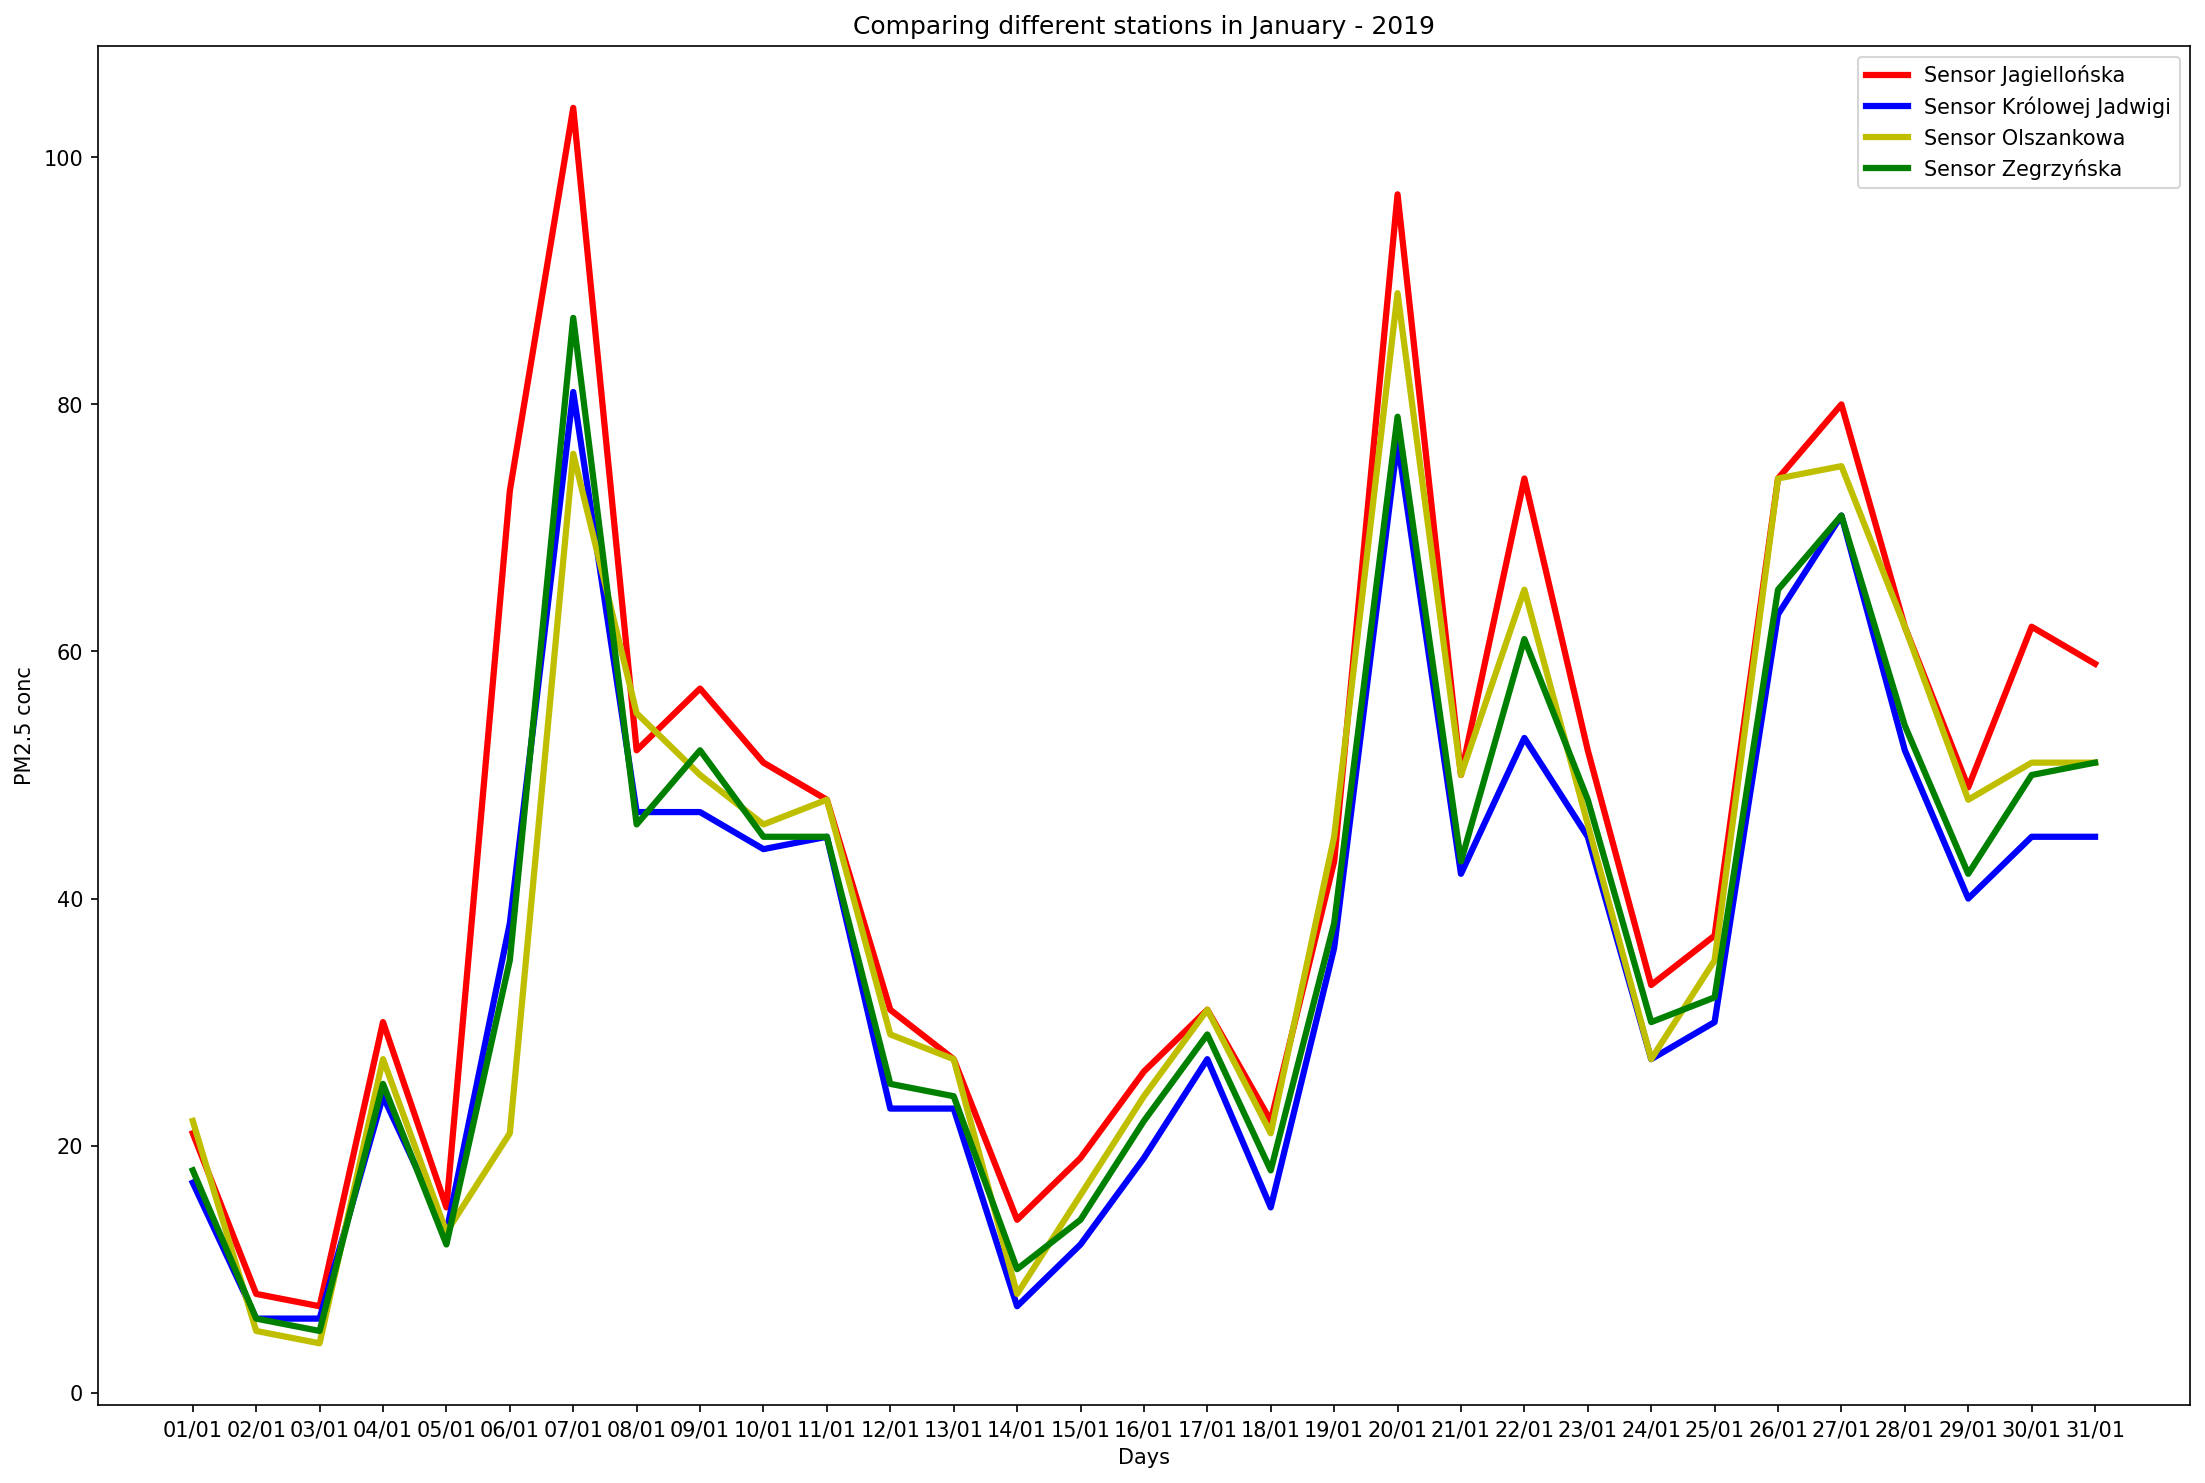

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(18, 12), dpi=150)

plt.plot(jandate1x,pm1jan, color ='r', label ='Sensor Jagiellońska', linewidth=3)
plt.plot(jandate1x,pm2jan, color = 'b', label = 'Sensor Królowej Jadwigi', linewidth=3)
plt.plot(jandate1x,pm3jan, color = 'y', label = 'Sensor Olszankowa', linewidth=3)
plt.plot(jandate1x,pm4jan, color = 'g', label = 'Sensor Zegrzyńska', linewidth=3)

plt.xlabel('Days')
plt.ylabel('PM2.5 conc')
plt.title('Comparing different stations in January - 2019')

plt.legend()
plt.show()



['01/02', '02/02', '03/02', '04/02', '05/02', '06/02', '07/02', '08/02', '09/02', '10/02', '11/02', '12/02', '13/02', '14/02', '15/02', '16/02', '17/02', '18/02', '19/02', '20/02', '21/02', '22/02', '23/02', '24/02', '25/02', '26/02', '27/02', '28/02']
[52, 30, 49, 28, 37, 50, 42, 44, 44, 31, 27, 17, 30, 34, 44, 39, 46, 50, 58, 19, 34, 12, 30, 43, 48, 22, 27, 36]
[42, 26, 42, 19, 33, 39, 38, 40, 41, 29, 22, 11, 24, 20, 36, 34, 36, 38, 51, 14, 25, 9, 22, 35, 39, 19, 19, 31]
[49, 31, 47, 23, 39, 51, 46, 50, 47, 33, 26, 9, 27, 21, 41, 45, 43, 52, 57, 15, 28, 7, 24, 44, 43, 19, 23, 33]
[47, 26, 44, 22, 34, 45, 39, 43, 43, 29, 24, 12, 25, 26, 38, 37, 41, 44, 53, 15, 27, 8, 22, 35, 40, 18, 22, 31]


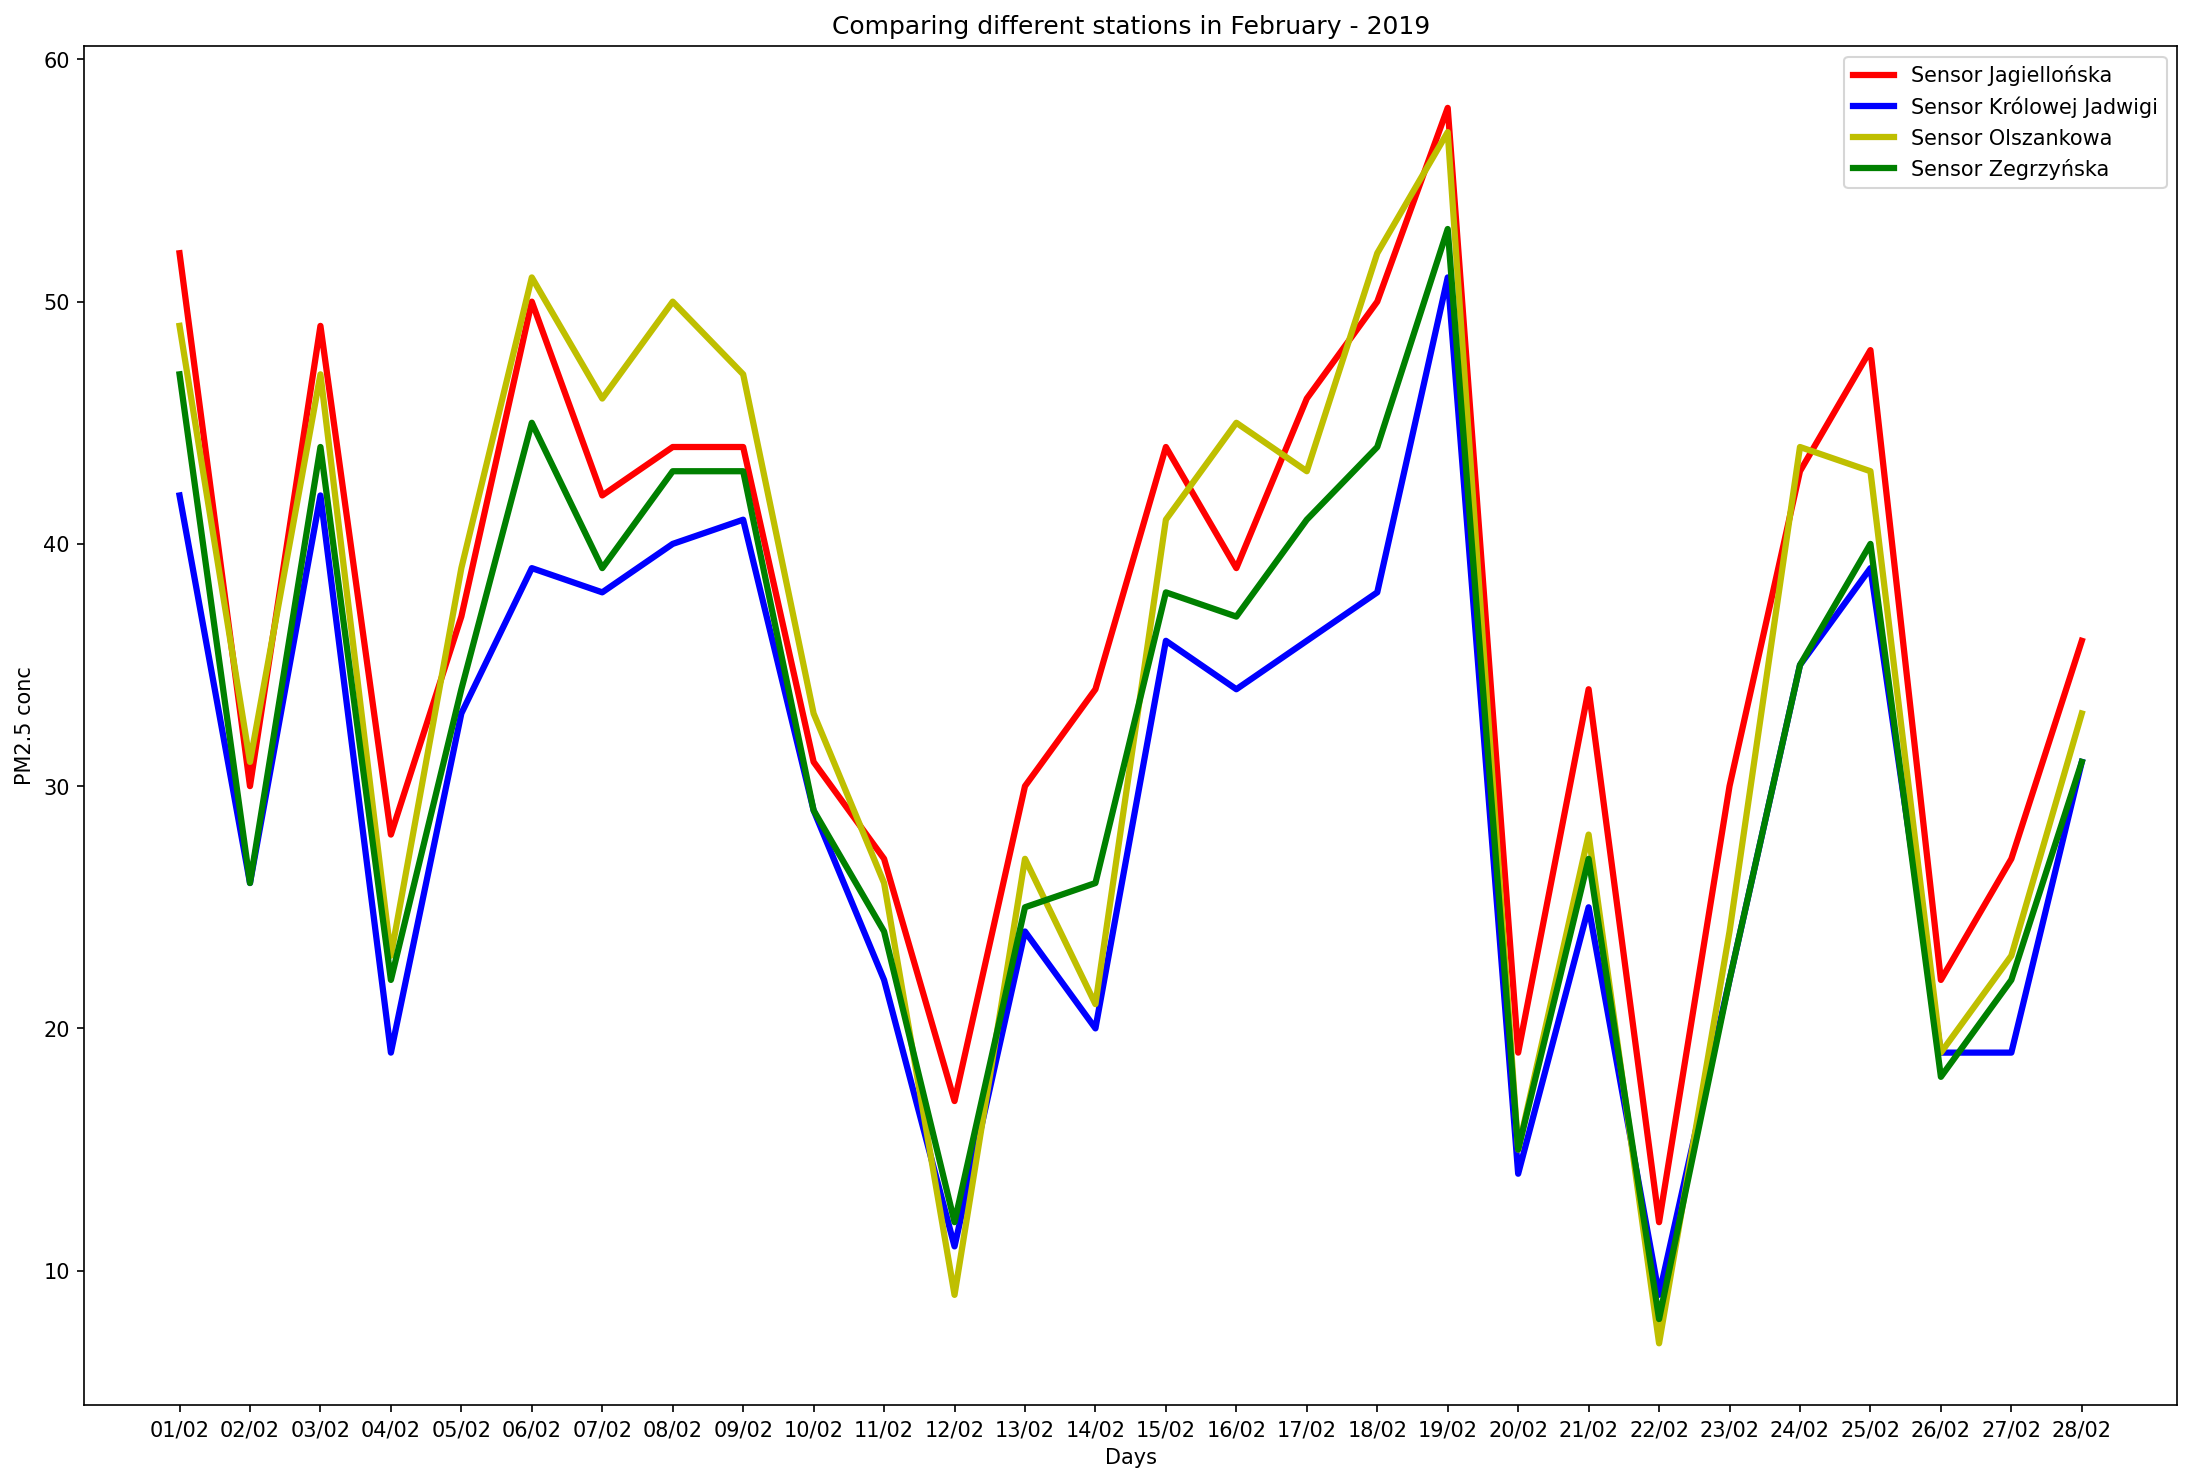

In [6]:
febdate1x = []
for x in Date1x:
    if x[3:5] == "02":
        febdate1x.append(x)
print(febdate1x)

pm1feb = []
for x in range(31,59):
    pm1feb.append(PM1[x])
print(pm1feb)

pm2feb = []
for x in range(31,59):
    pm2feb.append(PM2[x])
print(pm2feb)

pm3feb = []
for x in range(31,59):
    pm3feb.append(PM3[x])
print(pm3feb)

pm4feb = []
for x in range(31,59):
    pm4feb.append(PM4[x])
print(pm4feb)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(18, 12), dpi=150)

plt.plot(febdate1x,pm1feb, color ='r', label ='Sensor Jagiellońska', linewidth=3)
plt.plot(febdate1x,pm2feb, color = 'b', label = 'Sensor Królowej Jadwigi', linewidth=3)
plt.plot(febdate1x,pm3feb, color = 'y', label = 'Sensor Olszankowa', linewidth=3)
plt.plot(febdate1x,pm4feb, color = 'g', label = 'Sensor Zegrzyńska', linewidth=3)

plt.xlabel('Days')
plt.ylabel('PM2.5 conc')
plt.title('Comparing different stations in February - 2019')

plt.legend()
plt.show()

['01/03', '02/03', '03/03', '04/03', '05/03', '06/03', '07/03', '08/03', '09/03', '10/03', '11/03', '12/03', '13/03', '14/03', '15/03', '16/03', '17/03', '18/03', '19/03', '20/03', '21/03', '22/03', '23/03', '24/03', '25/03', '26/03', '27/03', '28/03', '29/03', '30/03', '31/03']
[26, 34, 44, 14, 11, 27, 28, 11, 18, 12, 18, 25, 31, 25, 20, 12, 22, 12, 25, 27, 23, 39, 53, 43, 38, 22, 17, 31, 31, 45, 47]
[22, 26, 37, 12, 8, 22, 27, 9, 16, 9, 13, 20, 28, 22, 18, 8, 20, 10, 17, 21, 18, 26, 34, 24, 23, 17, 10, 19, 23, 36, 36]
[23, 38, 44, 15, 11, 25, 30, 11, 19, 13, 18, 24, 38, 29, 21, 12, 26, 12, 22, 26, 21, 21, 43, 21, 29, 17, 14, 22, 28, 44, 46]
[21, 27, 39, 15, 9, 25, 27, 10, 17, 10, 14, 21, 30, 24, 19, 10, 24, 11, 17, 22, 20, 27, 40, 29, 28, 18, 12, 22, 26, 38, 37]


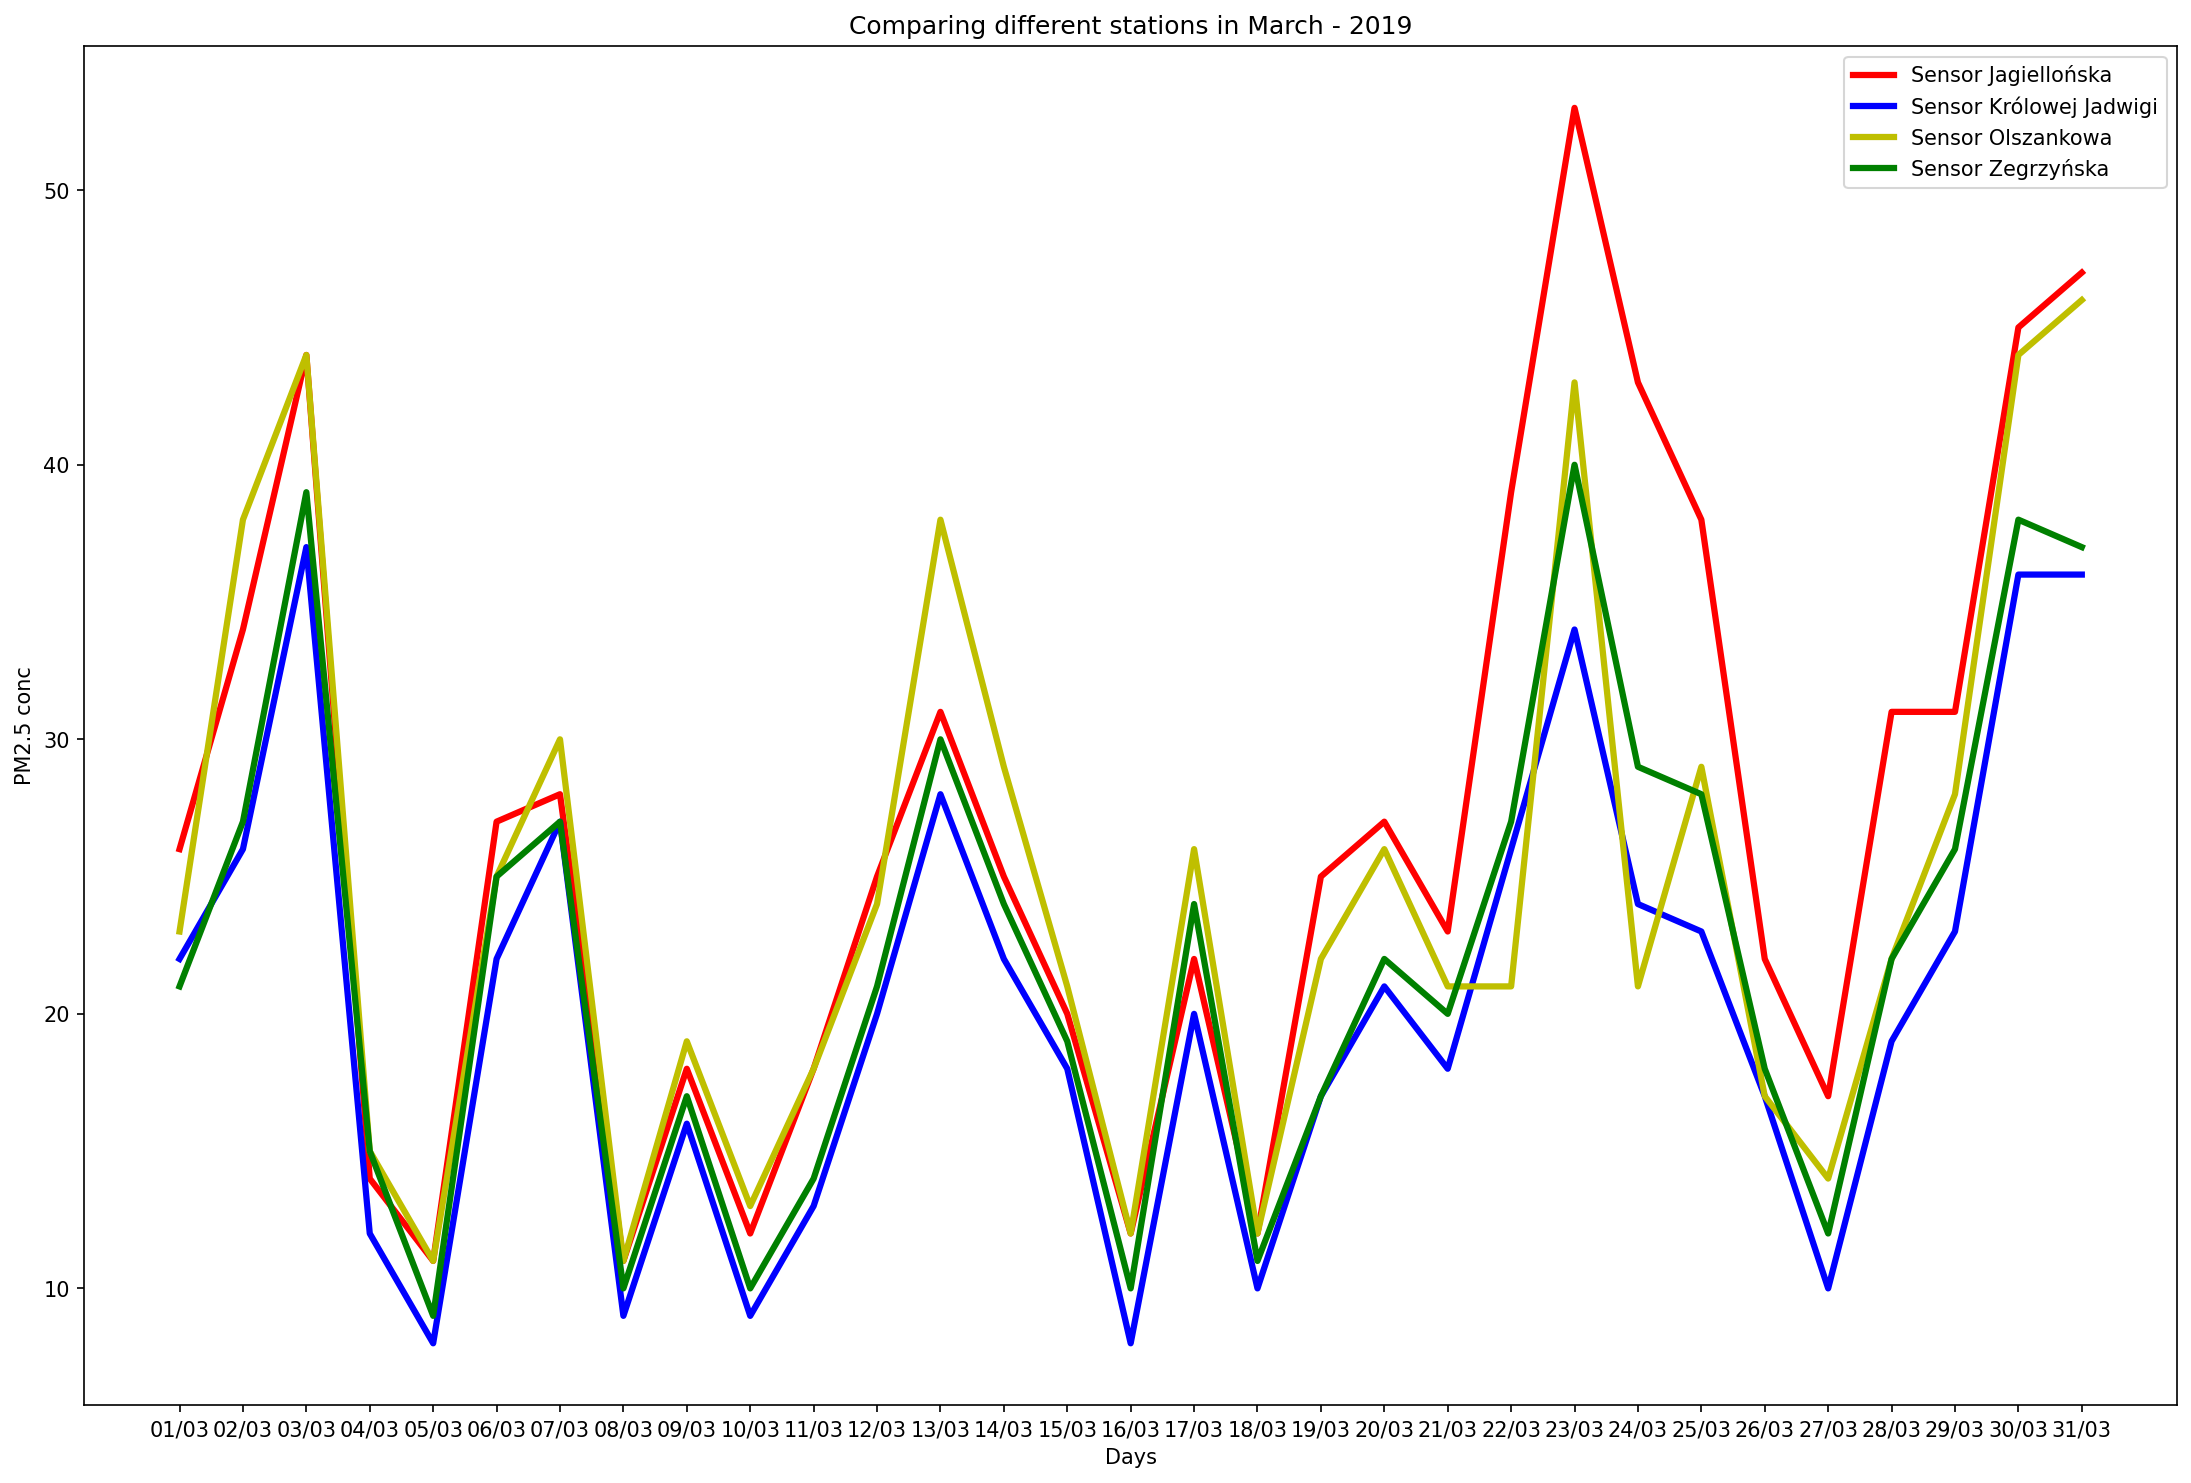

In [7]:
mardate1x = []
for x in Date1x:
    if x[3:5] == "03":
        mardate1x.append(x)
print(mardate1x)

pm1mar = []
for x in range(59,90):
    pm1mar.append(PM1[x])
print(pm1mar)

pm2mar = []
for x in range(59,90):
    pm2mar.append(PM2[x])
print(pm2mar)

pm3mar = []
for x in range(59,90):
    pm3mar.append(PM3[x])
print(pm3mar)

pm4mar = []
for x in range(59,90):
    pm4mar.append(PM4[x])
print(pm4mar)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(18, 12), dpi=150)

plt.plot(mardate1x,pm1mar, color ='r', label ='Sensor Jagiellońska', linewidth=3)
plt.plot(mardate1x,pm2mar, color = 'b', label = 'Sensor Królowej Jadwigi', linewidth=3)
plt.plot(mardate1x,pm3mar, color = 'y', label = 'Sensor Olszankowa', linewidth=3)
plt.plot(mardate1x,pm4mar, color = 'g', label = 'Sensor Zegrzyńska', linewidth=3)

plt.xlabel('Days')
plt.ylabel('PM2.5 conc')
plt.title('Comparing different stations in March - 2019')

plt.legend()
plt.show()

['01/04', '02/04', '03/04', '04/04', '05/04', '06/04', '07/04', '08/04', '09/04', '10/04', '11/04', '12/04', '13/04', '14/04', '15/04', '16/04', '17/04', '18/04', '19/04', '20/04', '21/04', '22/04', '23/04', '24/04', '25/04', '26/04', '27/04', '28/04', '29/04', '30/04']
[28, 19, 22, 30, 30, 32, 49, 73, 21, 19, 24, 30, 24, 17, 29, 29, 30, 50, 42, 22, 16, 20, 21, 17, 18, 22, 30, 17, 28, 23]
[14, 15, 19, 27, 28, 27, 38, 58, 19, 17, 19, 22, 19, 13, 15, 20, 21, 25, 17, 15, 13, 18, 19, 16, 17, 19, 27, 14, 26, 21]
[14, 17, 22, 30, 30, 30, 39, 54, 20, 18, 20, 20, 21, 15, 17, 26, 23, 24, 15, 15, 15, 20, 21, 18, 19, 23, 29, 16, 28, 21]
[21, 17, 21, 29, 30, 30, 38, 59, 20, 17, 20, 23, 22, 14, 22, 24, 25, 26, 17, 16, 15, 21, 21, 18, 19, 23, 30, 16, 28, 23]


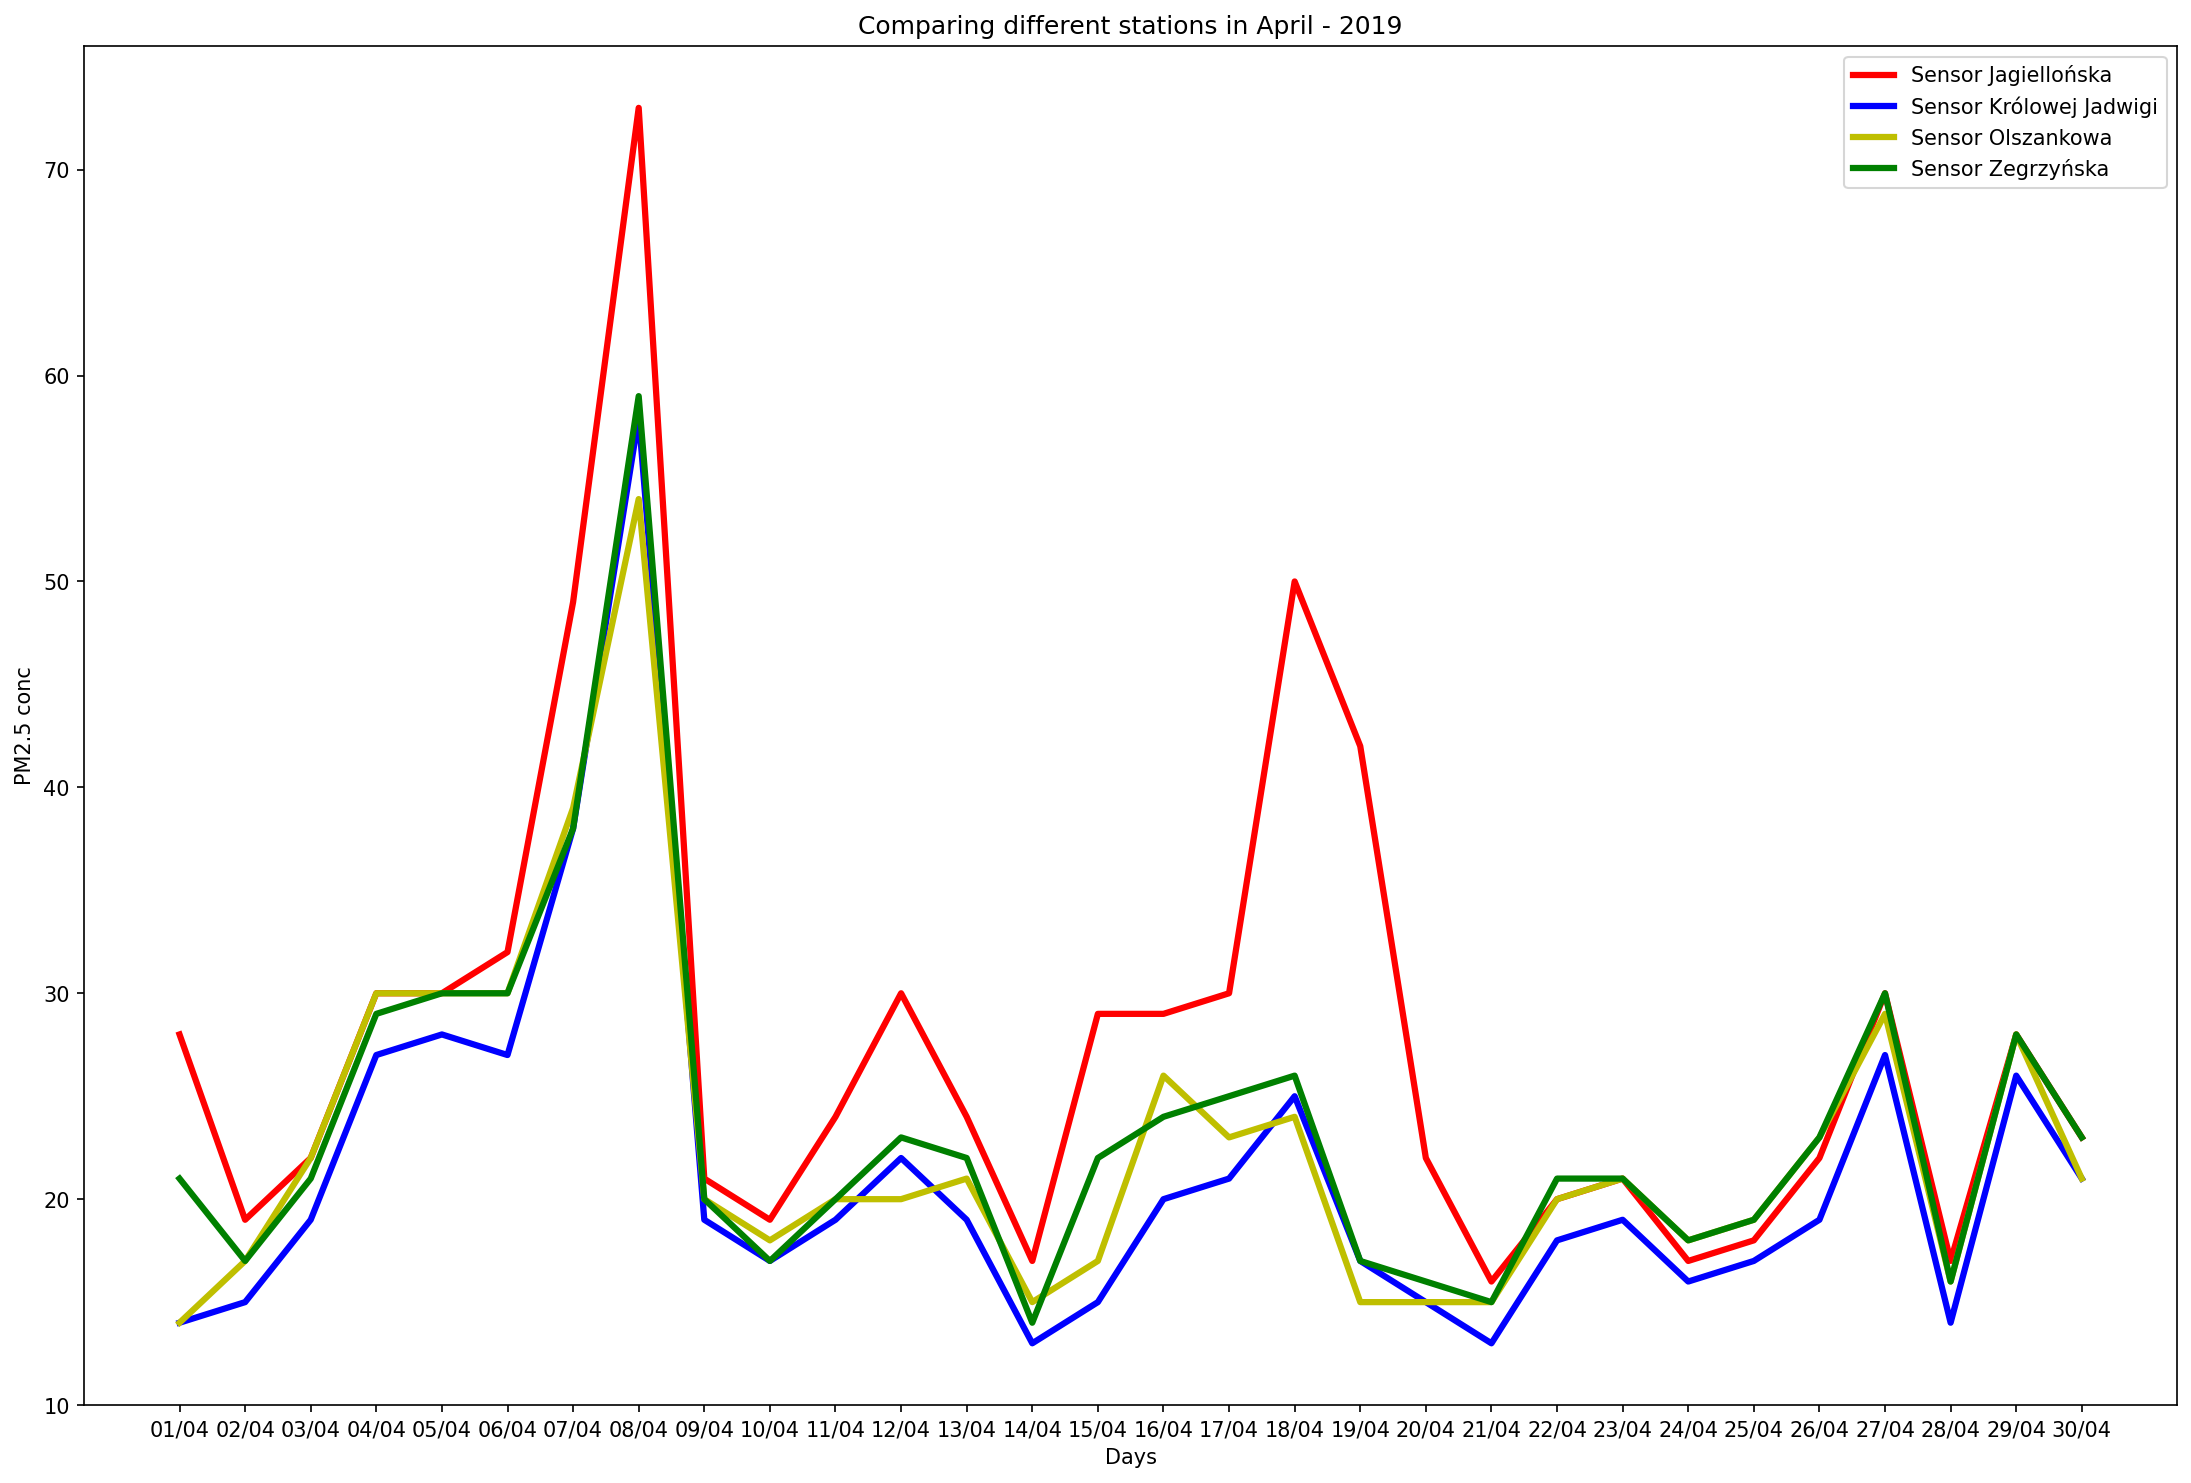

In [8]:
aprdate1x = []
for x in Date1x:
    if x[3:5] == "04":
        aprdate1x.append(x)
print(aprdate1x)

pm1apr = []
for x in range(90,120):
    pm1apr.append(PM1[x])
print(pm1apr)

pm2apr = []
for x in range(90,120):
    pm2apr.append(PM2[x])
print(pm2apr)

pm3apr = []
for x in range(90,120):
    pm3apr.append(PM3[x])
print(pm3apr)

pm4apr = []
for x in range(90,120):
    pm4apr.append(PM4[x])
print(pm4apr)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(18, 12), dpi=150)

plt.plot(aprdate1x,pm1apr, color ='r', label ='Sensor Jagiellońska', linewidth=3)
plt.plot(aprdate1x,pm2apr, color = 'b', label = 'Sensor Królowej Jadwigi', linewidth=3)
plt.plot(aprdate1x,pm3apr, color = 'y', label = 'Sensor Olszankowa', linewidth=3)
plt.plot(aprdate1x,pm4apr, color = 'g', label = 'Sensor Zegrzyńska', linewidth=3)

plt.xlabel('Days')
plt.ylabel('PM2.5 conc')
plt.title('Comparing different stations in April - 2019')

plt.legend()
plt.show()

['01/05', '02/05', '03/05', '04/05', '05/05', '06/05', '07/05', '08/05', '09/05', '10/05', '11/05', '12/05', '13/05', '14/05', '15/05', '16/05', '17/05', '18/05', '19/05', '20/05', '21/05', '22/05', '23/05', '24/05', '25/05', '26/05', '27/05', '28/05', '29/05', '30/05', '31/05']
[17, 17, 16, 20, 8, 11, 23, 32, 13, 29, 33, 23, 13, 13, 20, 21, 15, 23, 16, 18, 12, 6, 18, 11, 16, 12, 14, 18, 6, 4, 10]
[13, 14, 13, 17, 6, 7, 15, 21, 11, 27, 26, 21, 8, 11, 18, 20, 13, 21, 15, 17, 11, 6, 17, 9, 13, 11, 13, 17, 6, 3, 9]
[15, 17, 14, 21, 7, 6, 15, 25, 14, 31, 29, 22, 10, 11, 20, 21, 13, 23, 17, 20, 13, 6, 18, 10, 16, 13, 14, 19, 6, 4, 11]
[15, 19, 14, 20, 6, 7, 17, 28, 13, 31, 30, 22, 10, 11, 19, 21, 15, 24, 17, 20, 13, 7, 18, 10, 14, 11, 14, 19, 6, 4, 11]


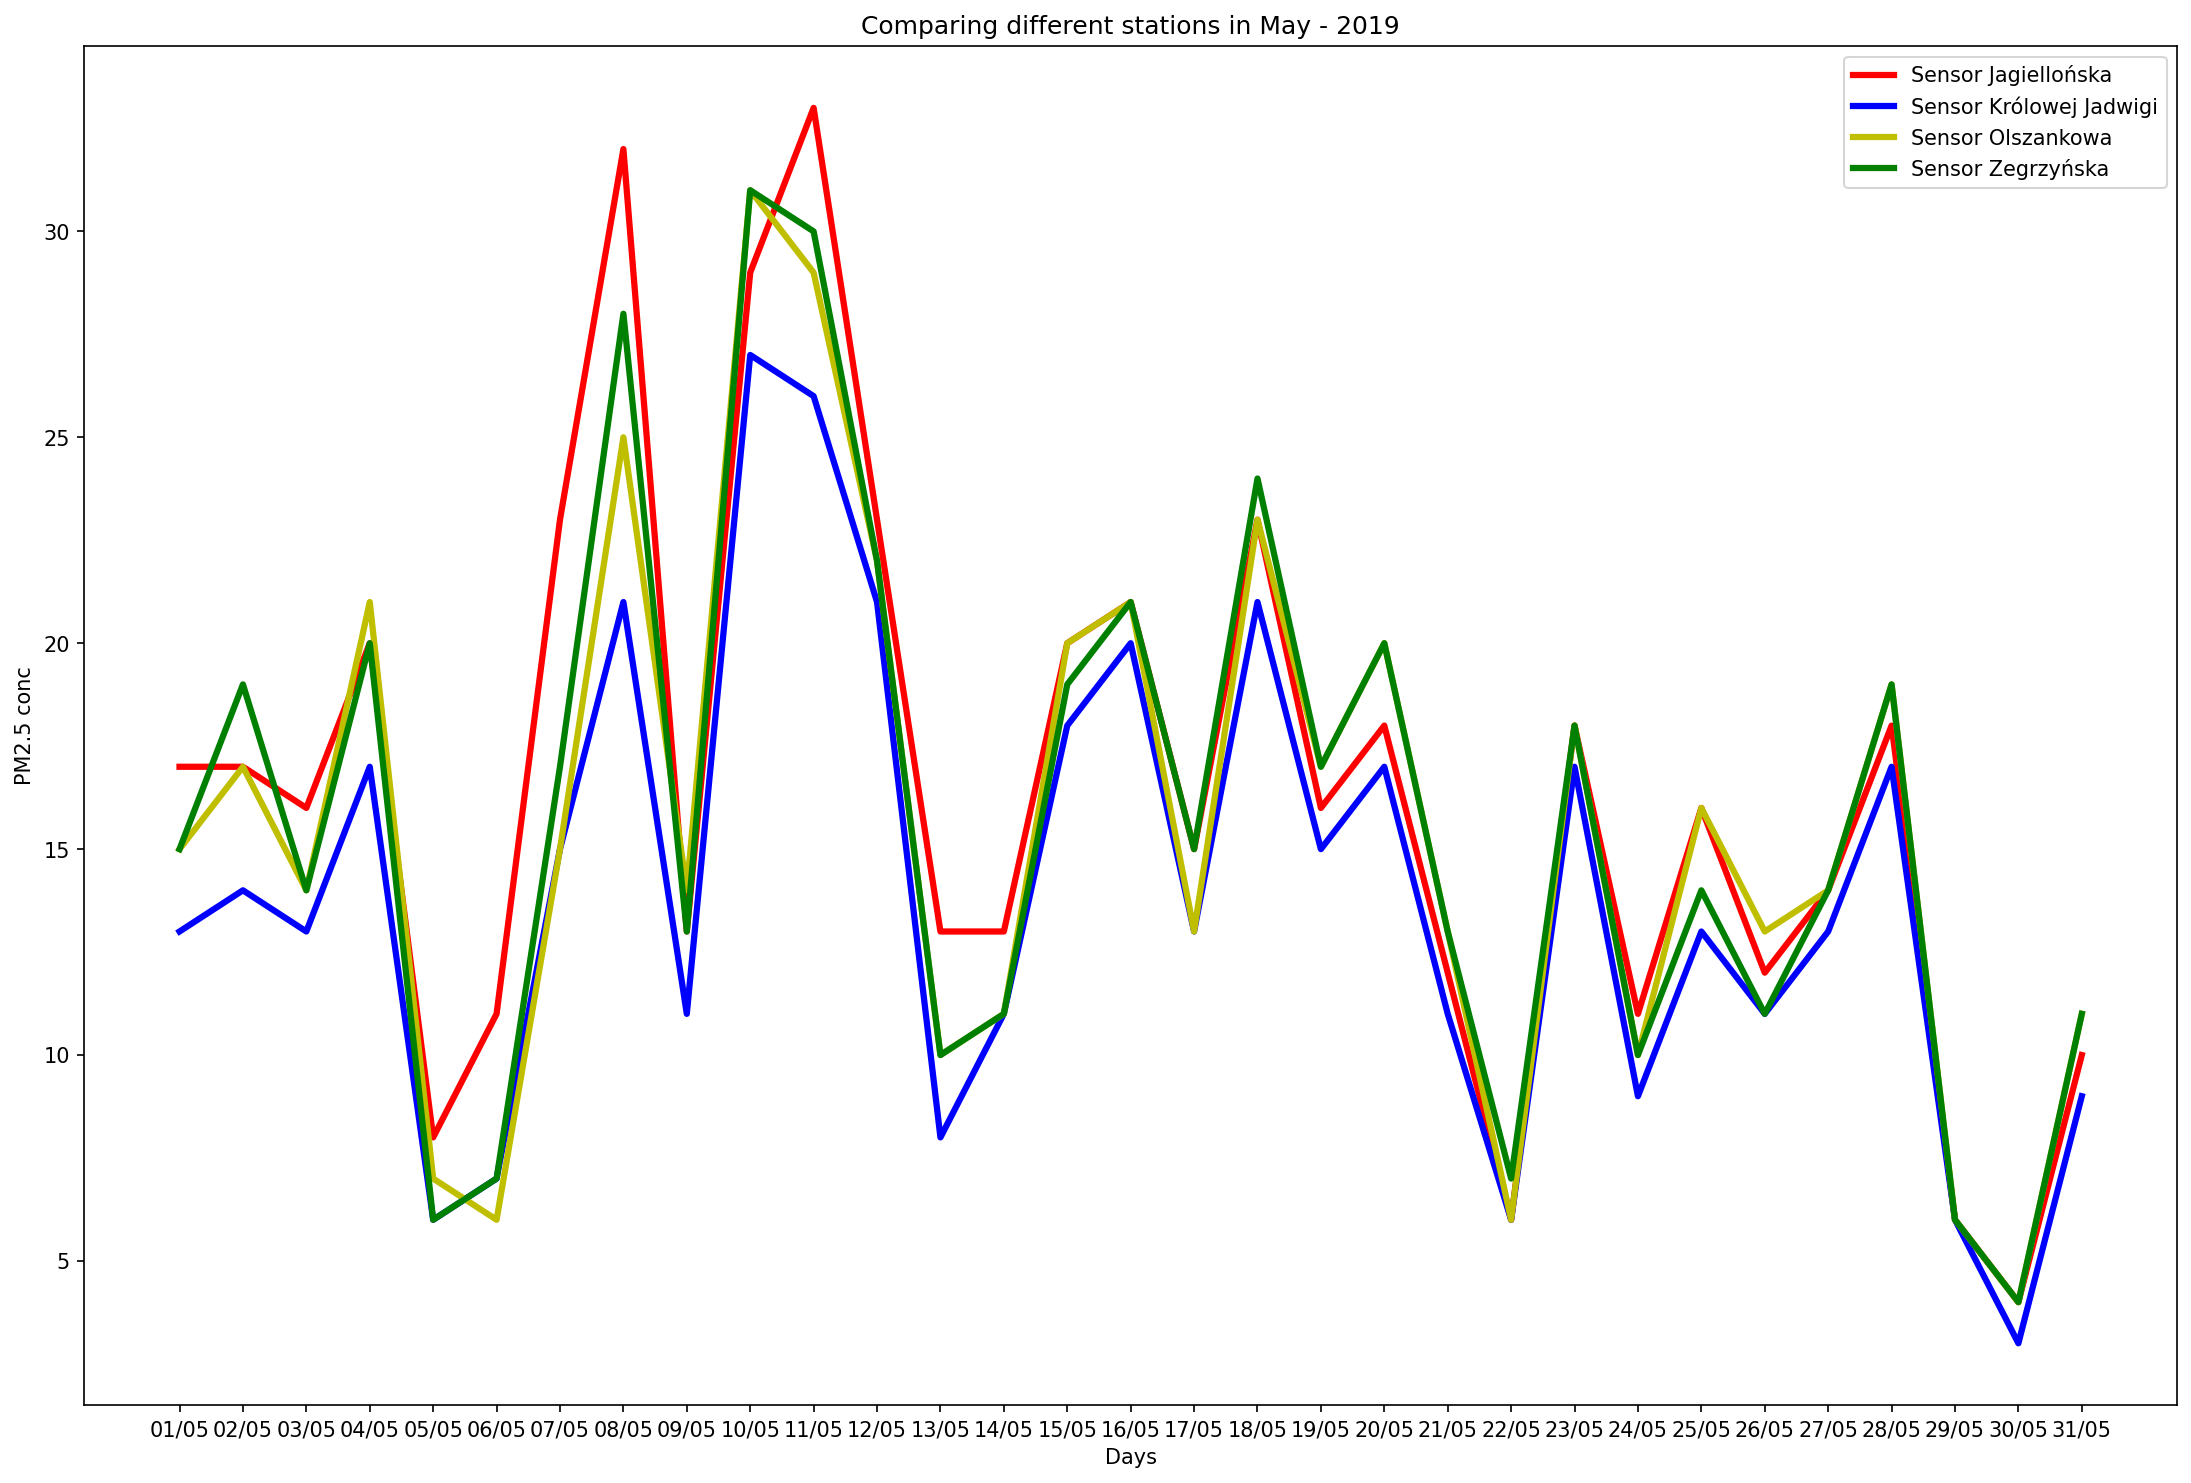

In [9]:
maydate1x = []
for x in Date1x:
    if x[3:5] == "05":
        maydate1x.append(x)
print(maydate1x)

pm1may = []
for x in range(120,151):
    pm1may.append(PM1[x])
print(pm1may)

pm2may = []
for x in range(120,151):
    pm2may.append(PM2[x])
print(pm2may)

pm3may = []
for x in range(120,151):
    pm3may.append(PM3[x])
print(pm3may)

pm4may = []
for x in range(120,151):
    pm4may.append(PM4[x])
print(pm4may)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(18, 12), dpi=150)

plt.plot(maydate1x,pm1may, color ='r', label ='Sensor Jagiellońska', linewidth=3)
plt.plot(maydate1x,pm2may, color = 'b', label = 'Sensor Królowej Jadwigi', linewidth=3)
plt.plot(maydate1x,pm3may, color = 'y', label = 'Sensor Olszankowa', linewidth=3)
plt.plot(maydate1x,pm4may, color = 'g', label = 'Sensor Zegrzyńska', linewidth=3)

plt.xlabel('Days')
plt.ylabel('PM2.5 conc')
plt.title('Comparing different stations in May - 2019')

plt.legend()
plt.show()

['01/06', '02/06', '03/06', '04/06', '05/06', '06/06', '07/06', '08/06', '09/06', '10/06', '11/06', '12/06', '13/06', '14/06', '15/06', '16/06', '17/06', '18/06', '19/06', '20/06', '21/06', '22/06', '23/06', '24/06', '25/06', '26/06', '27/06', '28/06', '29/06', '30/06']
[14, 18, 7, 16, 16, 15, 13, 23, 6, 13, 20, 18, 20, 13, 18, 15, 7, 7, 15, 18, 15, 7, 3, 6, 10, 19, 13, 5, 4, 10]
[12, 16, 6, 15, 15, 14, 12, 22, 5, 12, 19, 18, 19, 12, 17, 14, 6, 6, 14, 17, 14, 6, 3, 5, 9, 17, 12, 4, 4, 9]
[15, 18, 8, 16, 17, 16, 14, 23, 6, 14, 21, 20, 20, 13, 19, 16, 8, 7, 16, 19, 15, 7, 4, 6, 11, 20, 13, 5, 4, 11]
[13, 17, 8, 17, 17, 16, 14, 23, 6, 14, 21, 19, 20, 13, 19, 15, 7, 7, 16, 18, 15, 7, 4, 6, 11, 19, 13, 5, 4, 10]


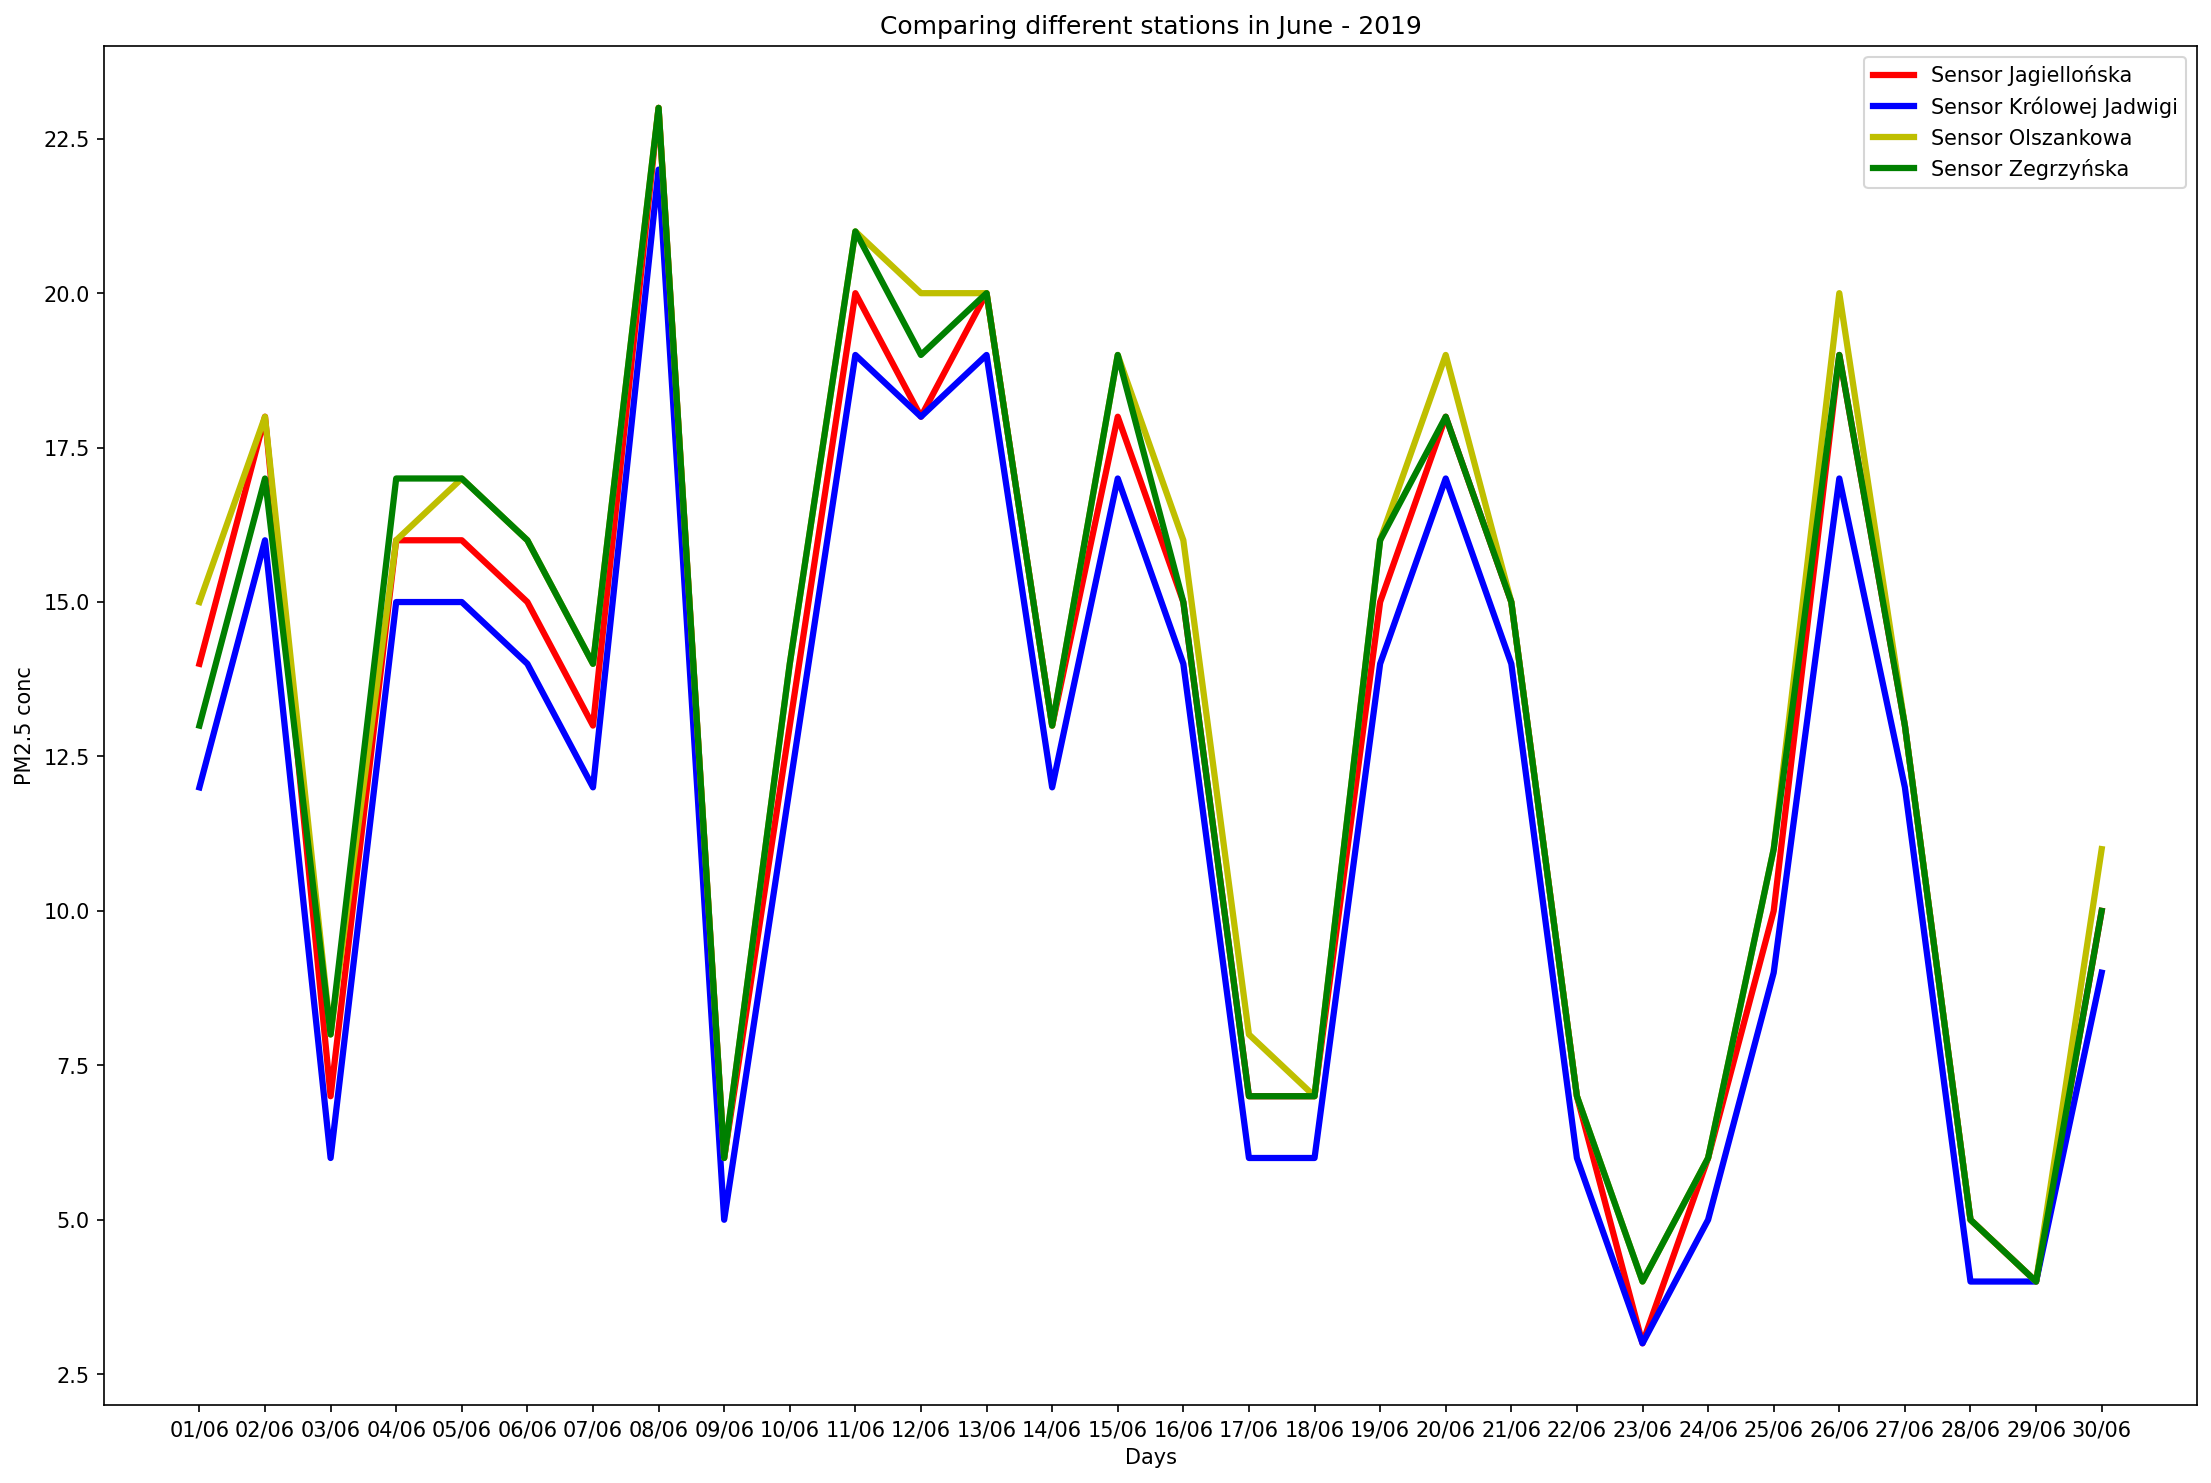

In [10]:
jundate1x = []
for x in Date1x:
    if x[3:5] == "06":
        jundate1x.append(x)
print(jundate1x)

pm1jun = []
for x in range(151,181):
    pm1jun.append(PM1[x])
print(pm1jun)

pm2jun = []
for x in range(151,181):
    pm2jun.append(PM2[x])
print(pm2jun)

pm3jun = []
for x in range(151,181):
    pm3jun.append(PM3[x])
print(pm3jun)

pm4jun = []
for x in range(151,181):
    pm4jun.append(PM4[x])
print(pm4jun)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(18, 12), dpi=150)

plt.plot(jundate1x,pm1jun, color ='r', label ='Sensor Jagiellońska', linewidth=3)
plt.plot(jundate1x,pm2jun, color = 'b', label = 'Sensor Królowej Jadwigi', linewidth=3)
plt.plot(jundate1x,pm3jun, color = 'y', label = 'Sensor Olszankowa', linewidth=3)
plt.plot(jundate1x,pm4jun, color = 'g', label = 'Sensor Zegrzyńska', linewidth=3)

plt.xlabel('Days')
plt.ylabel('PM2.5 conc')
plt.title('Comparing different stations in June - 2019')

plt.legend()
plt.show()

['01/07', '02/07', '03/07', '04/07', '05/07', '06/07', '07/07', '08/07', '09/07', '10/07', '11/07', '12/07', '13/07', '14/07', '15/07', '16/07', '17/07', '18/07', '19/07', '20/07', '21/07', '22/07', '23/07', '24/07', '25/07', '26/07', '27/07', '28/07', '29/07', '30/07', '31/07']
[10, 5, 2, 3, 4, 8, 10, 5, 6, 5, 6, 10, 14, 6, 5, 12, 7, 6, 13, 19, 18, 6, 9, 9, 9, 7, 11, 18, 20, 22, 7]
[9, 4, 2, 2, 3, 6, 9, 5, 5, 5, 5, 8, 13, 5, 4, 10, 5, 5, 11, 18, 17, 5, 8, 8, 7, 7, 10, 18, 19, 21, 6]
[10, 5, 2, 3, 4, 8, 10, 5, 6, 6, 6, 10, 13, 6, 5, 13, 6, 5, 15, 20, 19, 7, 9, 9, 8, 8, 11, 19, 20, 23, 8]
[10, 5, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


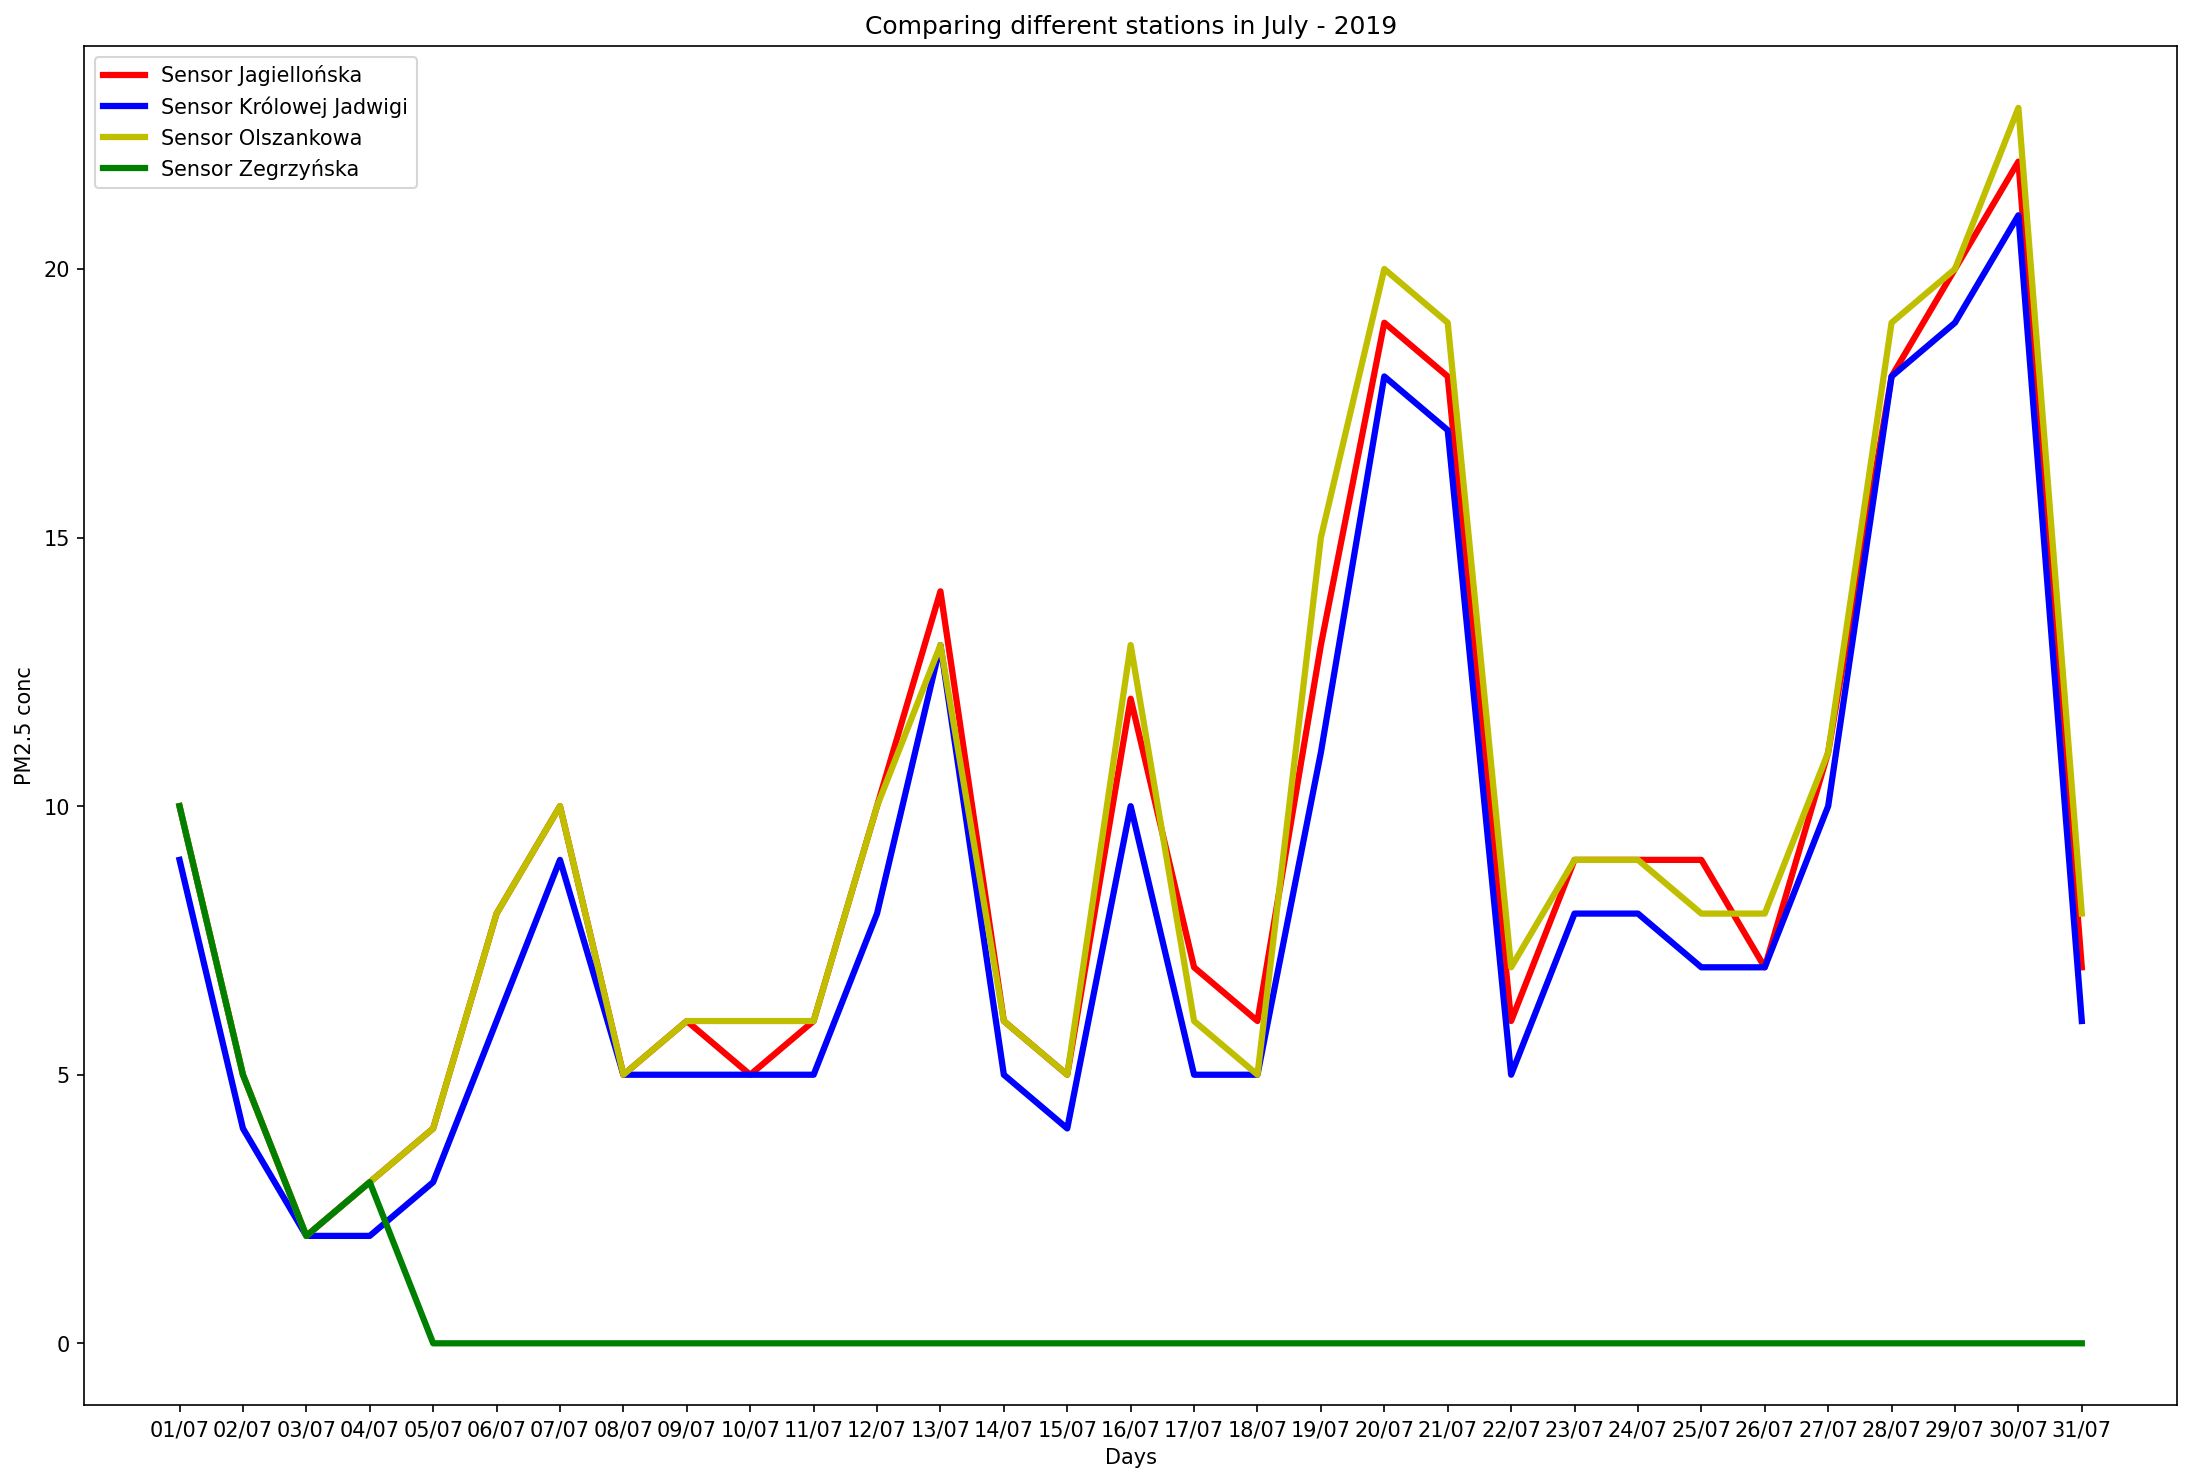

In [11]:
juldate1x = []
for x in Date1x:
    if x[3:5] == "07":
        juldate1x.append(x)
print(juldate1x)

pm1jul = []
for x in range(181,212):
    pm1jul.append(PM1[x])
print(pm1jul)

pm2jul = []
for x in range(181,212):
    pm2jul.append(PM2[x])
print(pm2jul)

pm3jul = []
for x in range(181,212):
    pm3jul.append(PM3[x])
print(pm3jul)

pm4jul = []
for x in range(181,212):
    pm4jul.append(PM4[x])
print(pm4jul)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(18, 12), dpi=150)

plt.plot(juldate1x,pm1jul, color ='r', label ='Sensor Jagiellońska', linewidth=3)
plt.plot(juldate1x,pm2jul, color = 'b', label = 'Sensor Królowej Jadwigi', linewidth=3)
plt.plot(juldate1x,pm3jul, color = 'y', label = 'Sensor Olszankowa', linewidth=3)
plt.plot(juldate1x,pm4jul, color = 'g', label = 'Sensor Zegrzyńska', linewidth=3)

plt.xlabel('Days')
plt.ylabel('PM2.5 conc')
plt.title('Comparing different stations in July - 2019')

plt.legend()
plt.show()

['01/08', '02/08', '03/08', '04/08', '05/08', '06/08', '07/08', '08/08', '09/08', '10/08', '11/08', '12/08', '13/08', '14/08', '15/08', '16/08', '17/08', '18/08', '19/08', '20/08', '21/08', '22/08', '23/08', '24/08', '25/08', '26/08', '27/08', '28/08', '29/08', '30/08', '31/08']
[7, 9, 11, 8, 9, 13, 14, 10, 9, 12, 7, 12, 14, 8, 11, 14, 15, 12, 8, 10, 8, 13, 11, 15, 14, 12, 16, 19, 26, 24, 14]
[6, 8, 10, 7, 8, 12, 13, 9, 7, 10, 6, 11, 12, 7, 9, 13, 14, 11, 7, 12, 7, 12, 10, 13, 12, 11, 15, 18, 24, 21, 13]
[8, 10, 11, 8, 9, 14, 15, 11, 8, 12, 9, 15, 14, 8, 11, 14, 16, 13, 9, 11, 9, 12, 11, 15, 14, 13, 17, 20, 26, 23, 14]
[0, 8, 11, 7, 9, 14, 17, 11, 9, 12, 7, 13, 14, 9, 11, 14, 15, 13, 9, 11, 9, 14, 13, 15, 13, 14, 17, 20, 26, 24, 15]


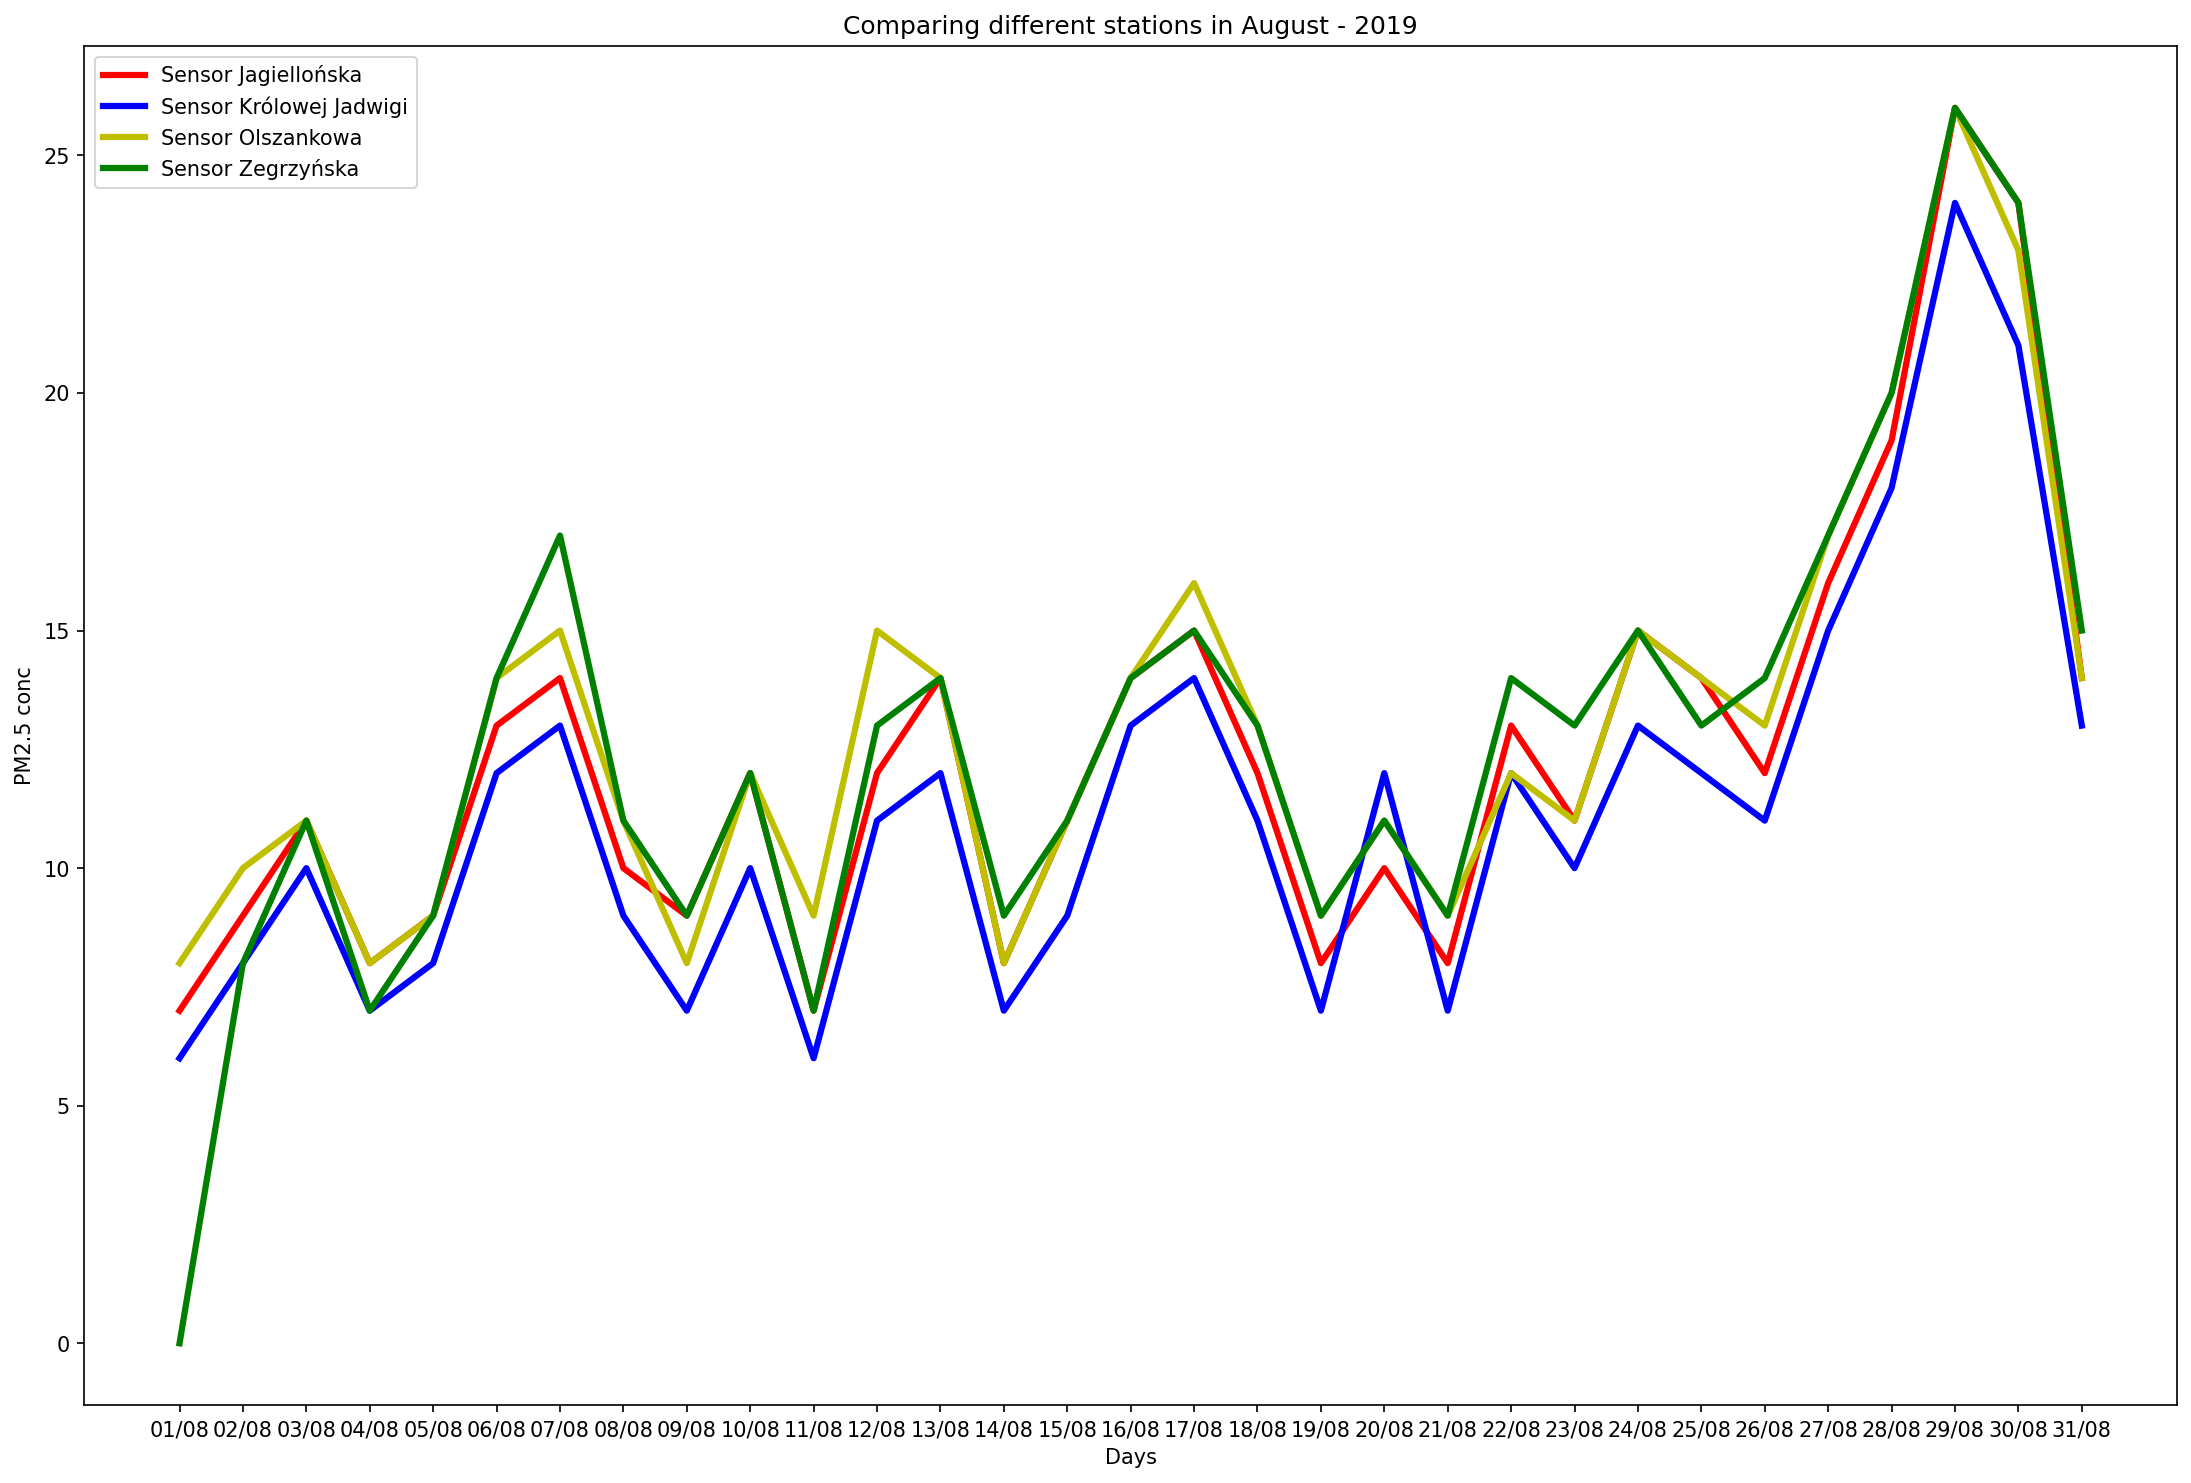

In [12]:
Augdate1x = []
for x in Date1x:
    if x[3:5] == "08":
        Augdate1x.append(x)
print(Augdate1x)

pm1aug = []
for x in range(212,243):
    pm1aug.append(PM1[x])
print(pm1aug)

pm2aug = []
for x in range(212,243):
    pm2aug.append(PM2[x])
print(pm2aug)

pm3aug = []
for x in range(212,243):
    pm3aug.append(PM3[x])
print(pm3aug)

pm4aug = []
for x in range(212,243):
    pm4aug.append(PM4[x])
print(pm4aug)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(18, 12), dpi=150)

plt.plot(Augdate1x,pm1aug, color ='r', label ='Sensor Jagiellońska', linewidth=3)
plt.plot(Augdate1x,pm2aug, color = 'b', label = 'Sensor Królowej Jadwigi', linewidth=3)
plt.plot(Augdate1x,pm3aug, color = 'y', label = 'Sensor Olszankowa', linewidth=3)
plt.plot(Augdate1x,pm4aug, color = 'g', label = 'Sensor Zegrzyńska', linewidth=3)

plt.xlabel('Days')
plt.ylabel('PM2.5 conc')
plt.title('Comparing different stations in August - 2019')

plt.legend()
plt.show()

['01/09', '02/09', '03/09', '04/09', '05/09', '06/09', '07/09', '08/09', '09/09', '10/09', '11/09', '12/09', '13/09', '14/09', '15/09', '16/09', '17/09', '18/09', '19/09', '20/09', '21/09', '22/09', '23/09', '24/09', '25/09', '26/09', '27/09', '28/09', '29/09', '30/09']
[18, 16, 6, 9, 12, 6, 14, 19, 20, 7, 14, 17, 14, 4, 9, 4, 5, 5, 10, 16, 17, 30, 27, 29, 41, 45, 29, 21, 9, 6]
[17, 14, 5, 8, 11, 4, 11, 17, 19, 7, 11, 15, 13, 3, 8, 3, 4, 2, 6, 10, 13, 21, 20, 23, 32, 40, 27, 19, 8, 5]
[19, 16, 7, 10, 13, 7, 14, 19, 20, 8, 14, 17, 14, 5, 9, 4, 5, 4, 10, 16, 18, 24, 19, 25, 34, 42, 29, 23, 10, 6]
[19, 16, 6, 11, 13, 6, 14, 19, 20, 9, 14, 17, 14, 3, 9, 4, 5, 3, 7, 14, 15, 25, 22, 26, 35, 42, 29, 21, 9, 6]


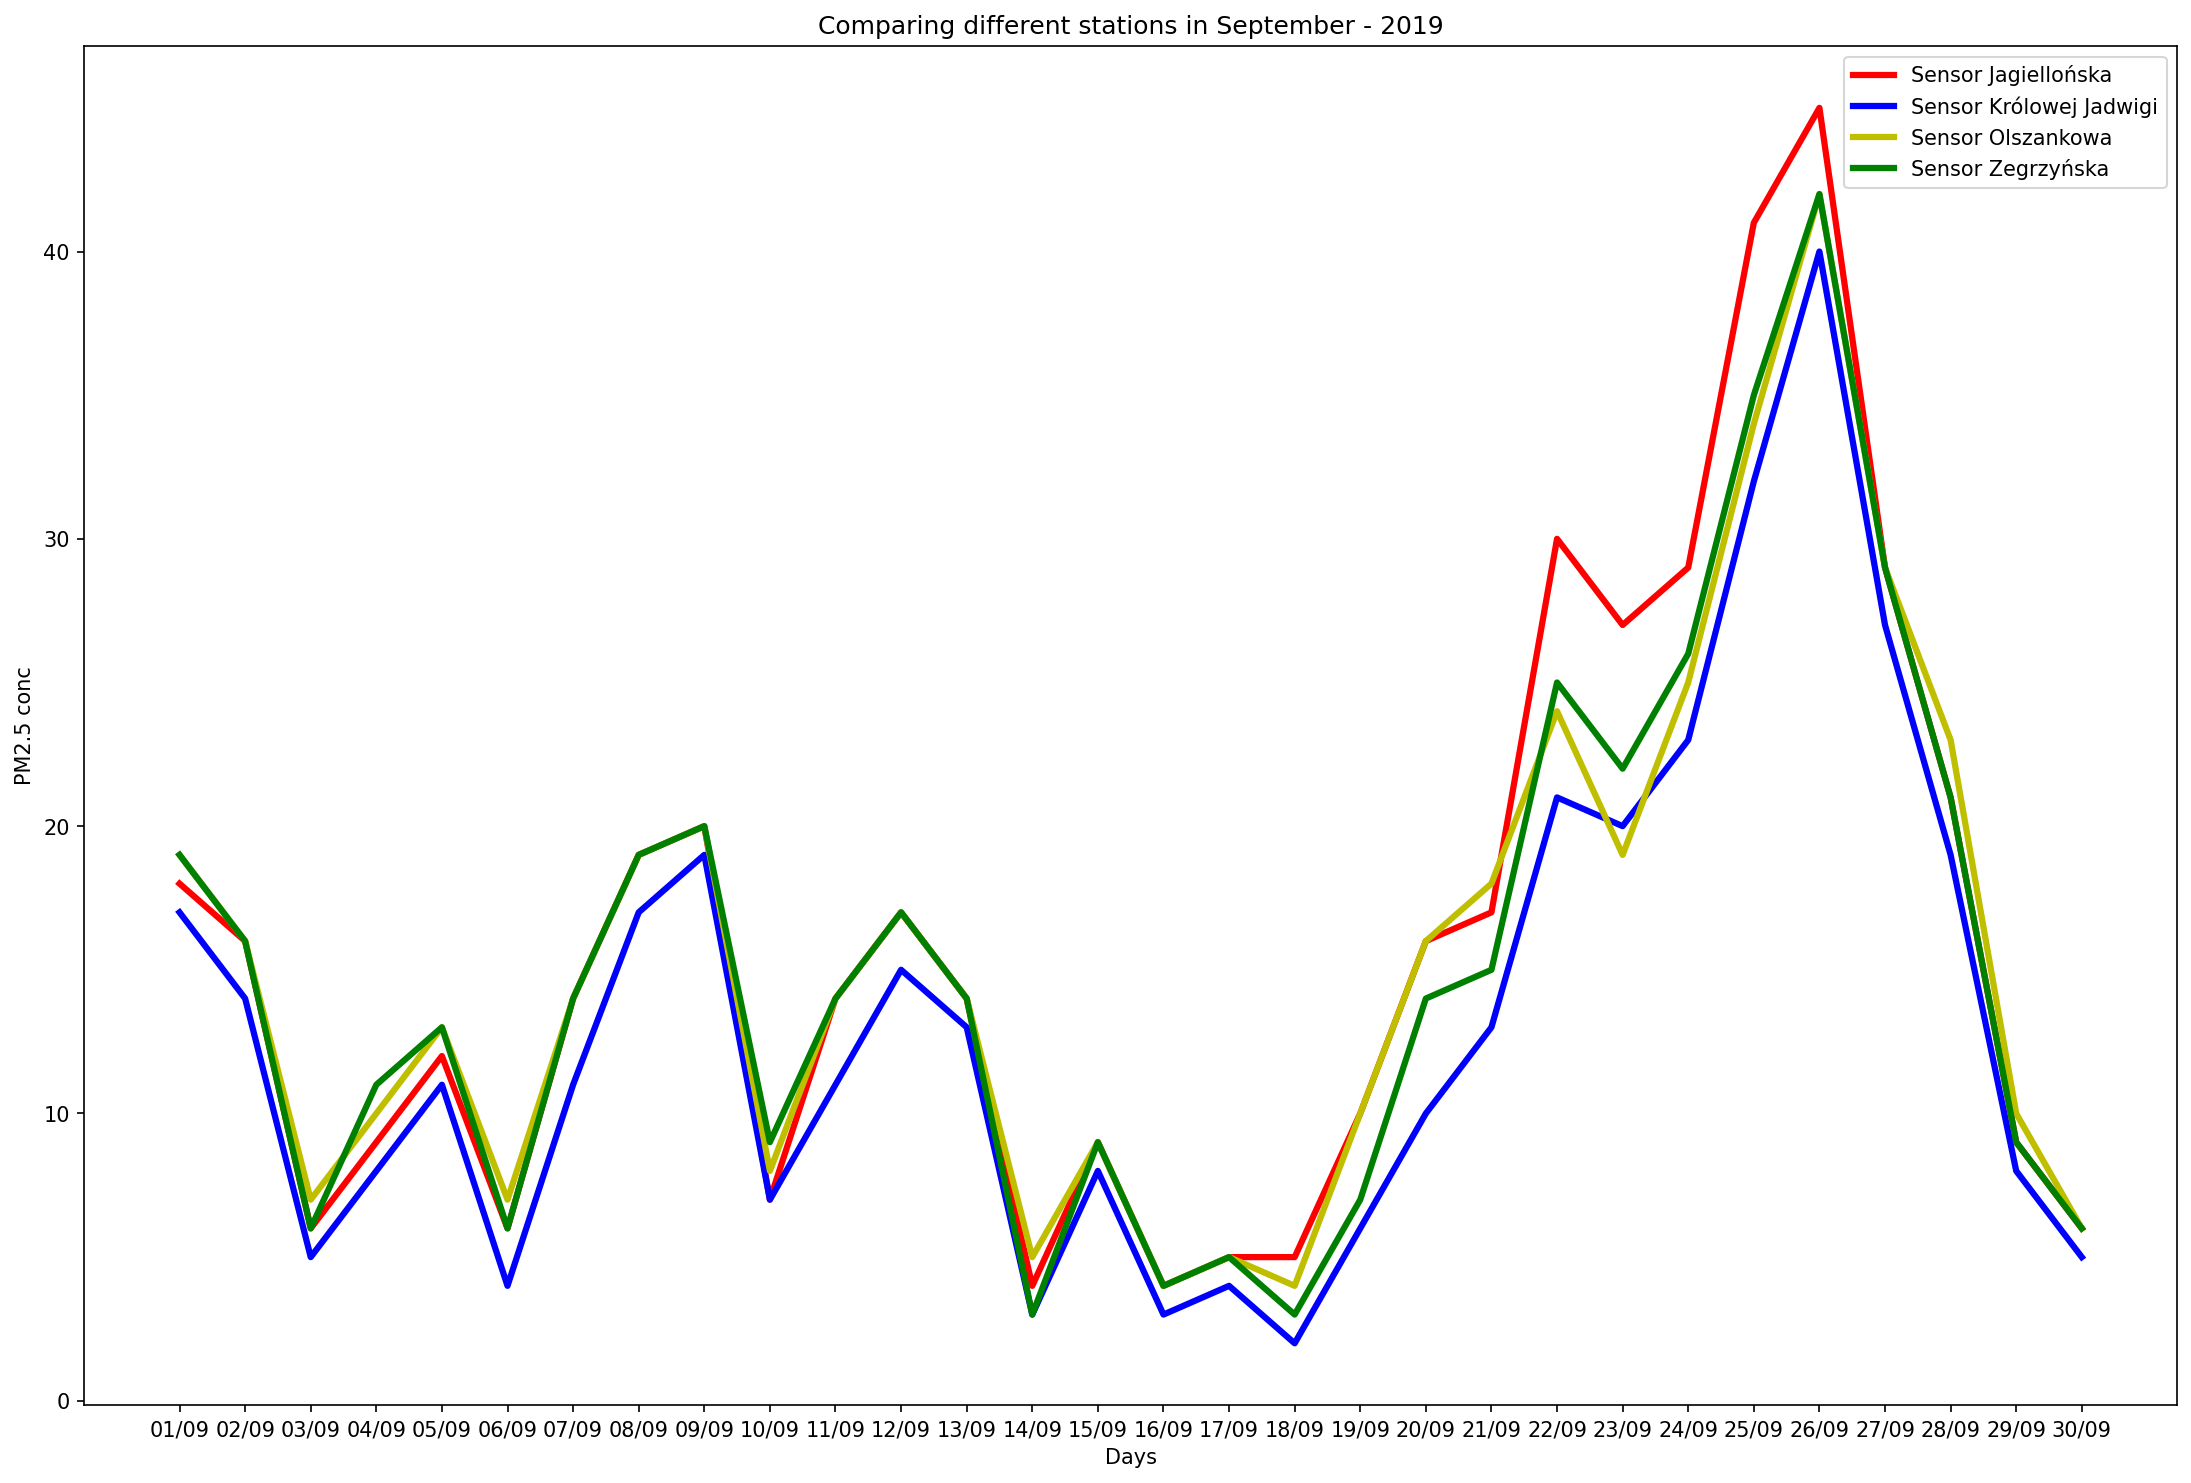

In [13]:
Sepdate1x = []
for x in Date1x:
    if x[3:5] == "09":
        Sepdate1x.append(x)
print(Sepdate1x)

pm1sep = []
for x in range(243,273):
    pm1sep.append(PM1[x])
print(pm1sep)

pm2sep = []
for x in range(243,273):
    pm2sep.append(PM2[x])
print(pm2sep)

pm3sep = []
for x in range(243,273):
    pm3sep.append(PM3[x])
print(pm3sep)

pm4sep = []
for x in range(243,273):
    pm4sep.append(PM4[x])
print(pm4sep)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(18, 12), dpi=150)

plt.plot(Sepdate1x,pm1sep, color ='r', label ='Sensor Jagiellońska', linewidth=3)
plt.plot(Sepdate1x,pm2sep, color = 'b', label = 'Sensor Królowej Jadwigi', linewidth=3)
plt.plot(Sepdate1x,pm3sep, color = 'y', label = 'Sensor Olszankowa', linewidth=3)
plt.plot(Sepdate1x,pm4sep, color = 'g', label = 'Sensor Zegrzyńska', linewidth=3)

plt.xlabel('Days')
plt.ylabel('PM2.5 conc')
plt.title('Comparing different stations in September - 2019')

plt.legend()
plt.show()

['01/10', '02/10', '03/10', '04/10', '05/10', '06/10', '07/10', '08/10', '09/10', '10/10', '11/10', '12/10', '13/10', '14/10', '15/10', '16/10', '17/10', '18/10', '19/10', '20/10', '21/10', '22/10', '23/10', '24/10', '25/10', '26/10', '27/10', '28/10', '29/10', '30/10', '31/10']
[5, 10, 17, 39, 24, 27, 26, 30, 20, 14, 11, 9, 16, 24, 33, 24, 15, 26, 46, 43, 46, 59, 45, 51, 60, 41, 20, 20, 36, 56, 65]
[4, 9, 12, 21, 20, 12, 19, 27, 17, 11, 10, 8, 15, 20, 30, 22, 13, 23, 34, 36, 29, 43, 36, 40, 48, 36, 16, 16, 23, 27, 37]
[6, 10, 16, 26, 21, 21, 30, 30, 21, 14, 12, 10, 19, 23, 32, 24, 18, 30, 39, 43, 34, 45, 38, 39, 55, 41, 18, 18, 22, 31, 55]
[5, 11, 14, 29, 21, 18, 22, 27, 19, 12, 12, 10, 17, 18, 29, 23, 16, 25, 39, 40, 34, 42, 34, 43, 51, 38, 18, 17, 25, 34, 49]


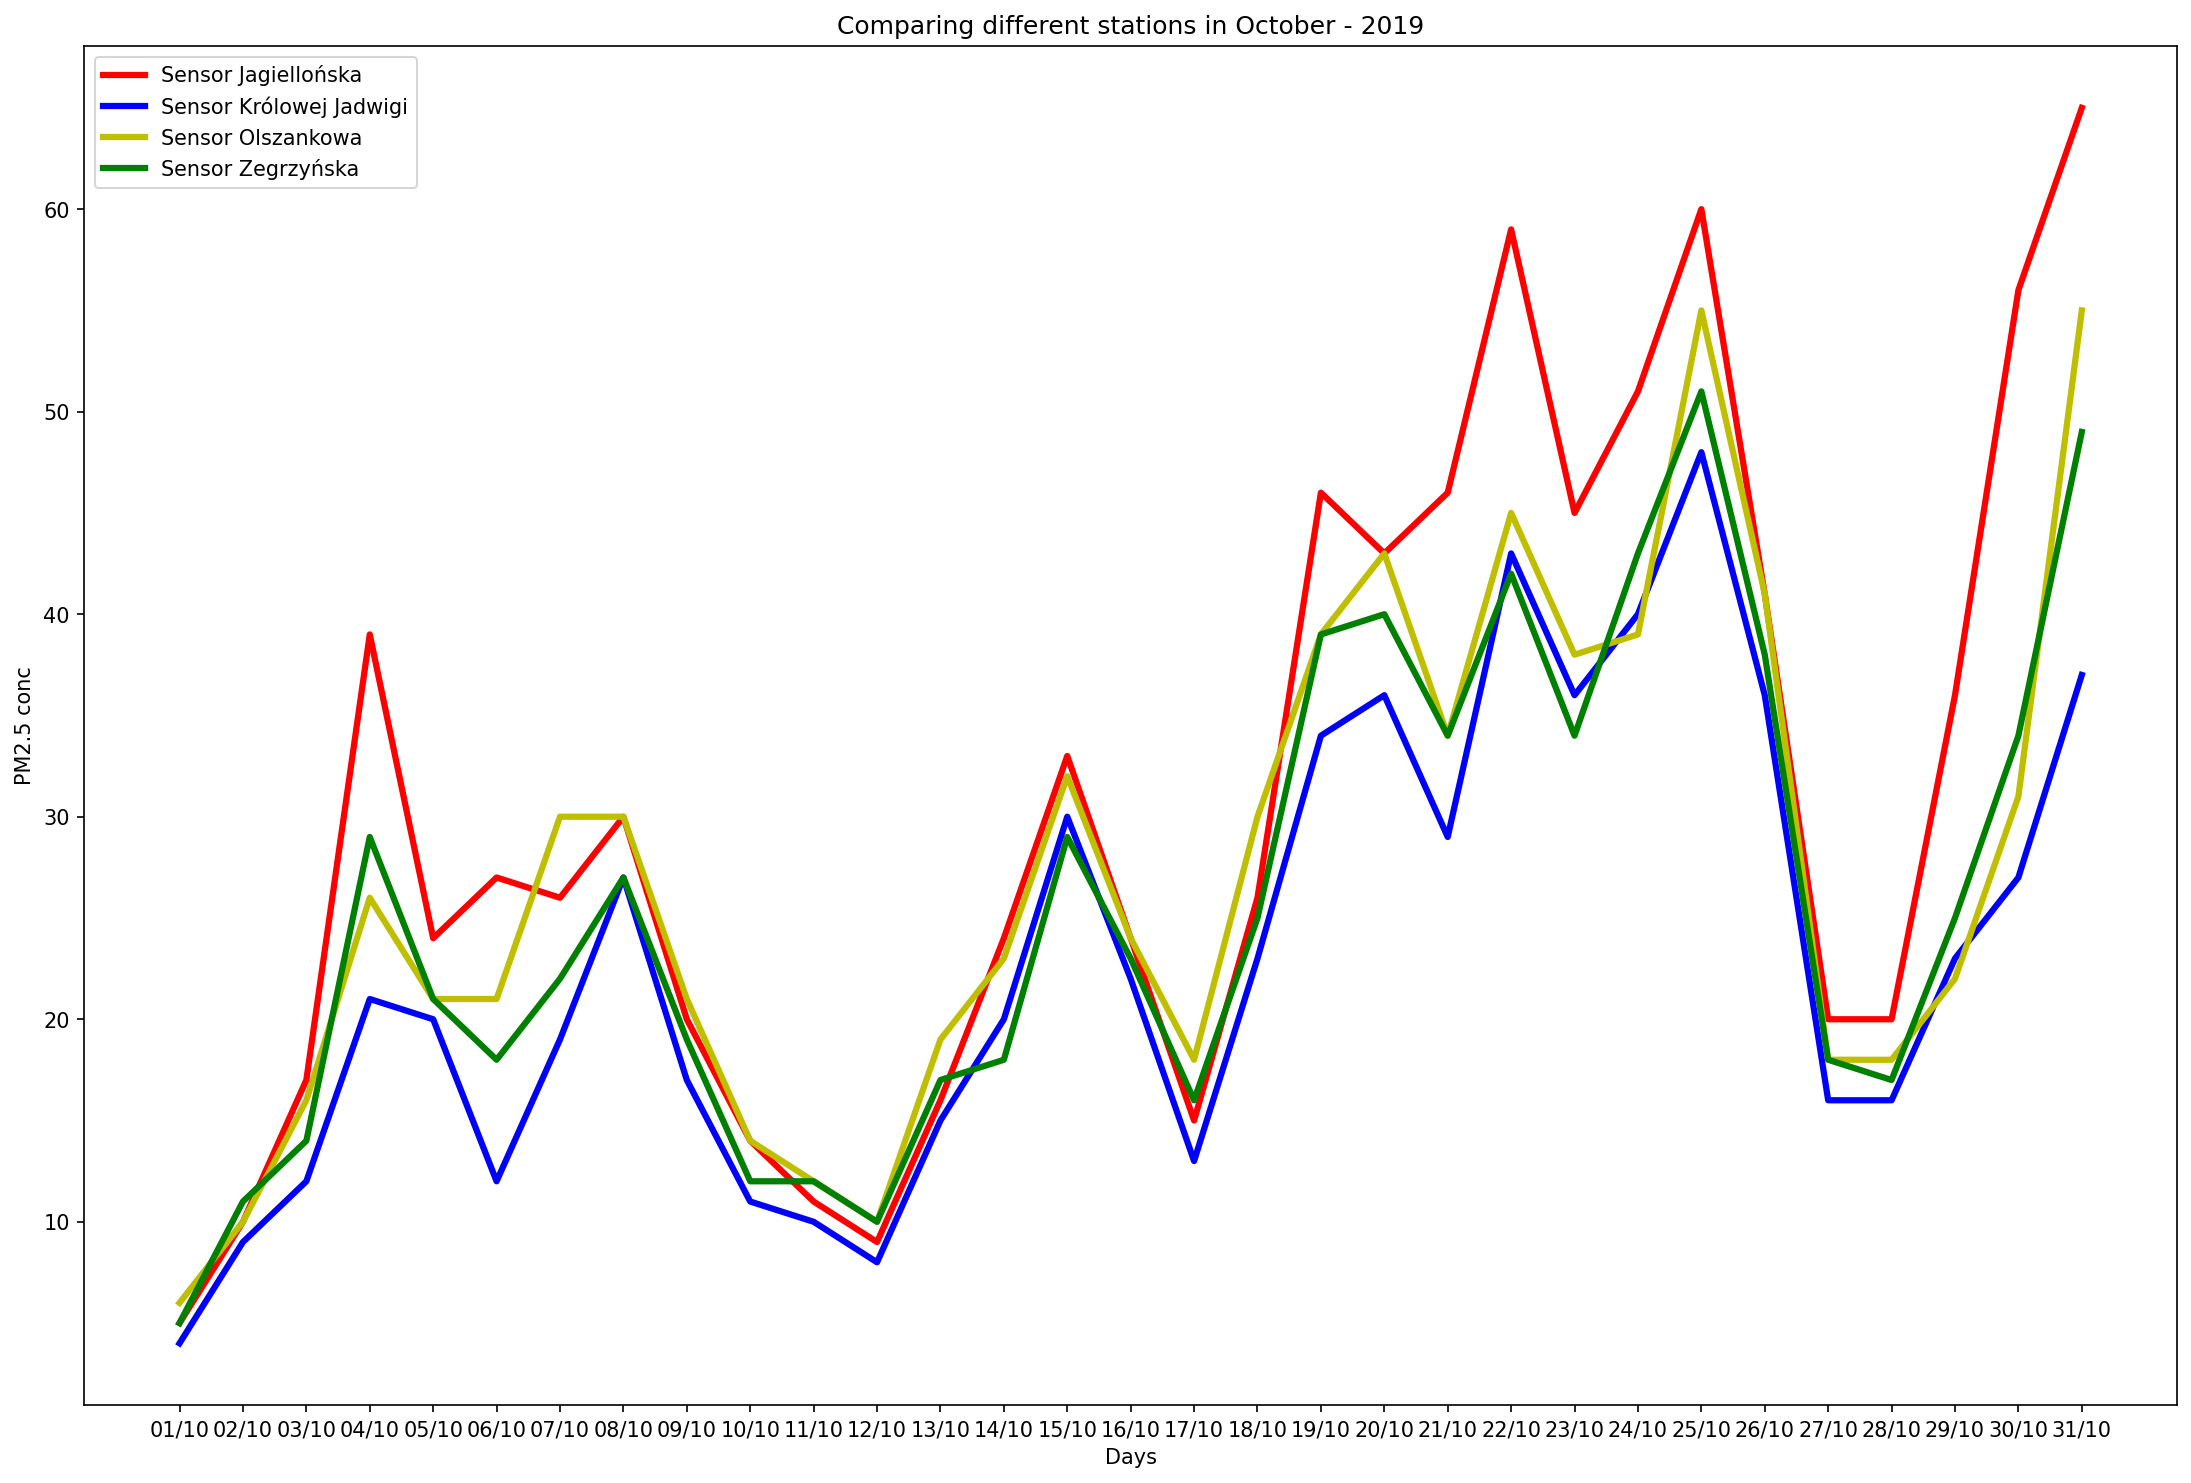

In [14]:
octdate1x = []
for x in Date1x:
    if x[3:5] == "10":
        octdate1x.append(x)
print(octdate1x)

pm1oct = []
for x in range(273,304):
    pm1oct.append(PM1[x])
print(pm1oct)

pm2oct = []
for x in range(273,304):
    pm2oct.append(PM2[x])
print(pm2oct)

pm3oct = []
for x in range(273,304):
    pm3oct.append(PM3[x])
print(pm3oct)

pm4oct = []
for x in range(273,304):
    pm4oct.append(PM4[x])
print(pm4oct)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(18, 12), dpi=150)

plt.plot(octdate1x,pm1oct, color ='r', label ='Sensor Jagiellońska', linewidth=3)
plt.plot(octdate1x,pm2oct, color = 'b', label = 'Sensor Królowej Jadwigi', linewidth=3)
plt.plot(octdate1x,pm3oct, color = 'y', label = 'Sensor Olszankowa', linewidth=3)
plt.plot(octdate1x,pm4oct, color = 'g', label = 'Sensor Zegrzyńska', linewidth=3)

plt.xlabel('Days')
plt.ylabel('PM2.5 conc')
plt.title('Comparing different stations in October - 2019')

plt.legend()
plt.show()

['01/11', '02/11', '03/11', '04/11', '05/11', '06/11', '07/11', '08/11', '09/11', '10/11', '11/11', '12/11', '13/11', '14/11', '15/11', '16/11', '17/11', '18/11', '19/11', '20/11', '21/11', '22/11', '23/11', '24/11', '25/11', '26/11', '27/11', '28/11', '29/11', '30/11']
[49, 31, 24, 23, 20, 27, 83, 44, 28, 33, 45, 34, 40, 33, 34, 32, 36, 33, 34, 32, 18, 25, 30, 36, 35, 40, 45, 37, 16, 20]
[42, 27, 21, 21, 17, 24, 46, 30, 25, 28, 34, 27, 31, 24, 29, 29, 30, 30, 29, 28, 15, 22, 25, 32, 30, 36, 39, 35, 13, 14]
[48, 30, 23, 22, 20, 25, 54, 35, 29, 28, 39, 29, 33, 24, 29, 30, 32, 31, 32, 28, 17, 23, 25, 31, 30, 37, 38, 39, 15, 18]
[44, 27, 22, 22, 20, 26, 58, 36, 26, 29, 40, 29, 34, 27, 31, 29, 32, 32, 30, 29, 18, 24, 27, 33, 31, 35, 38, 35, 14, 15]


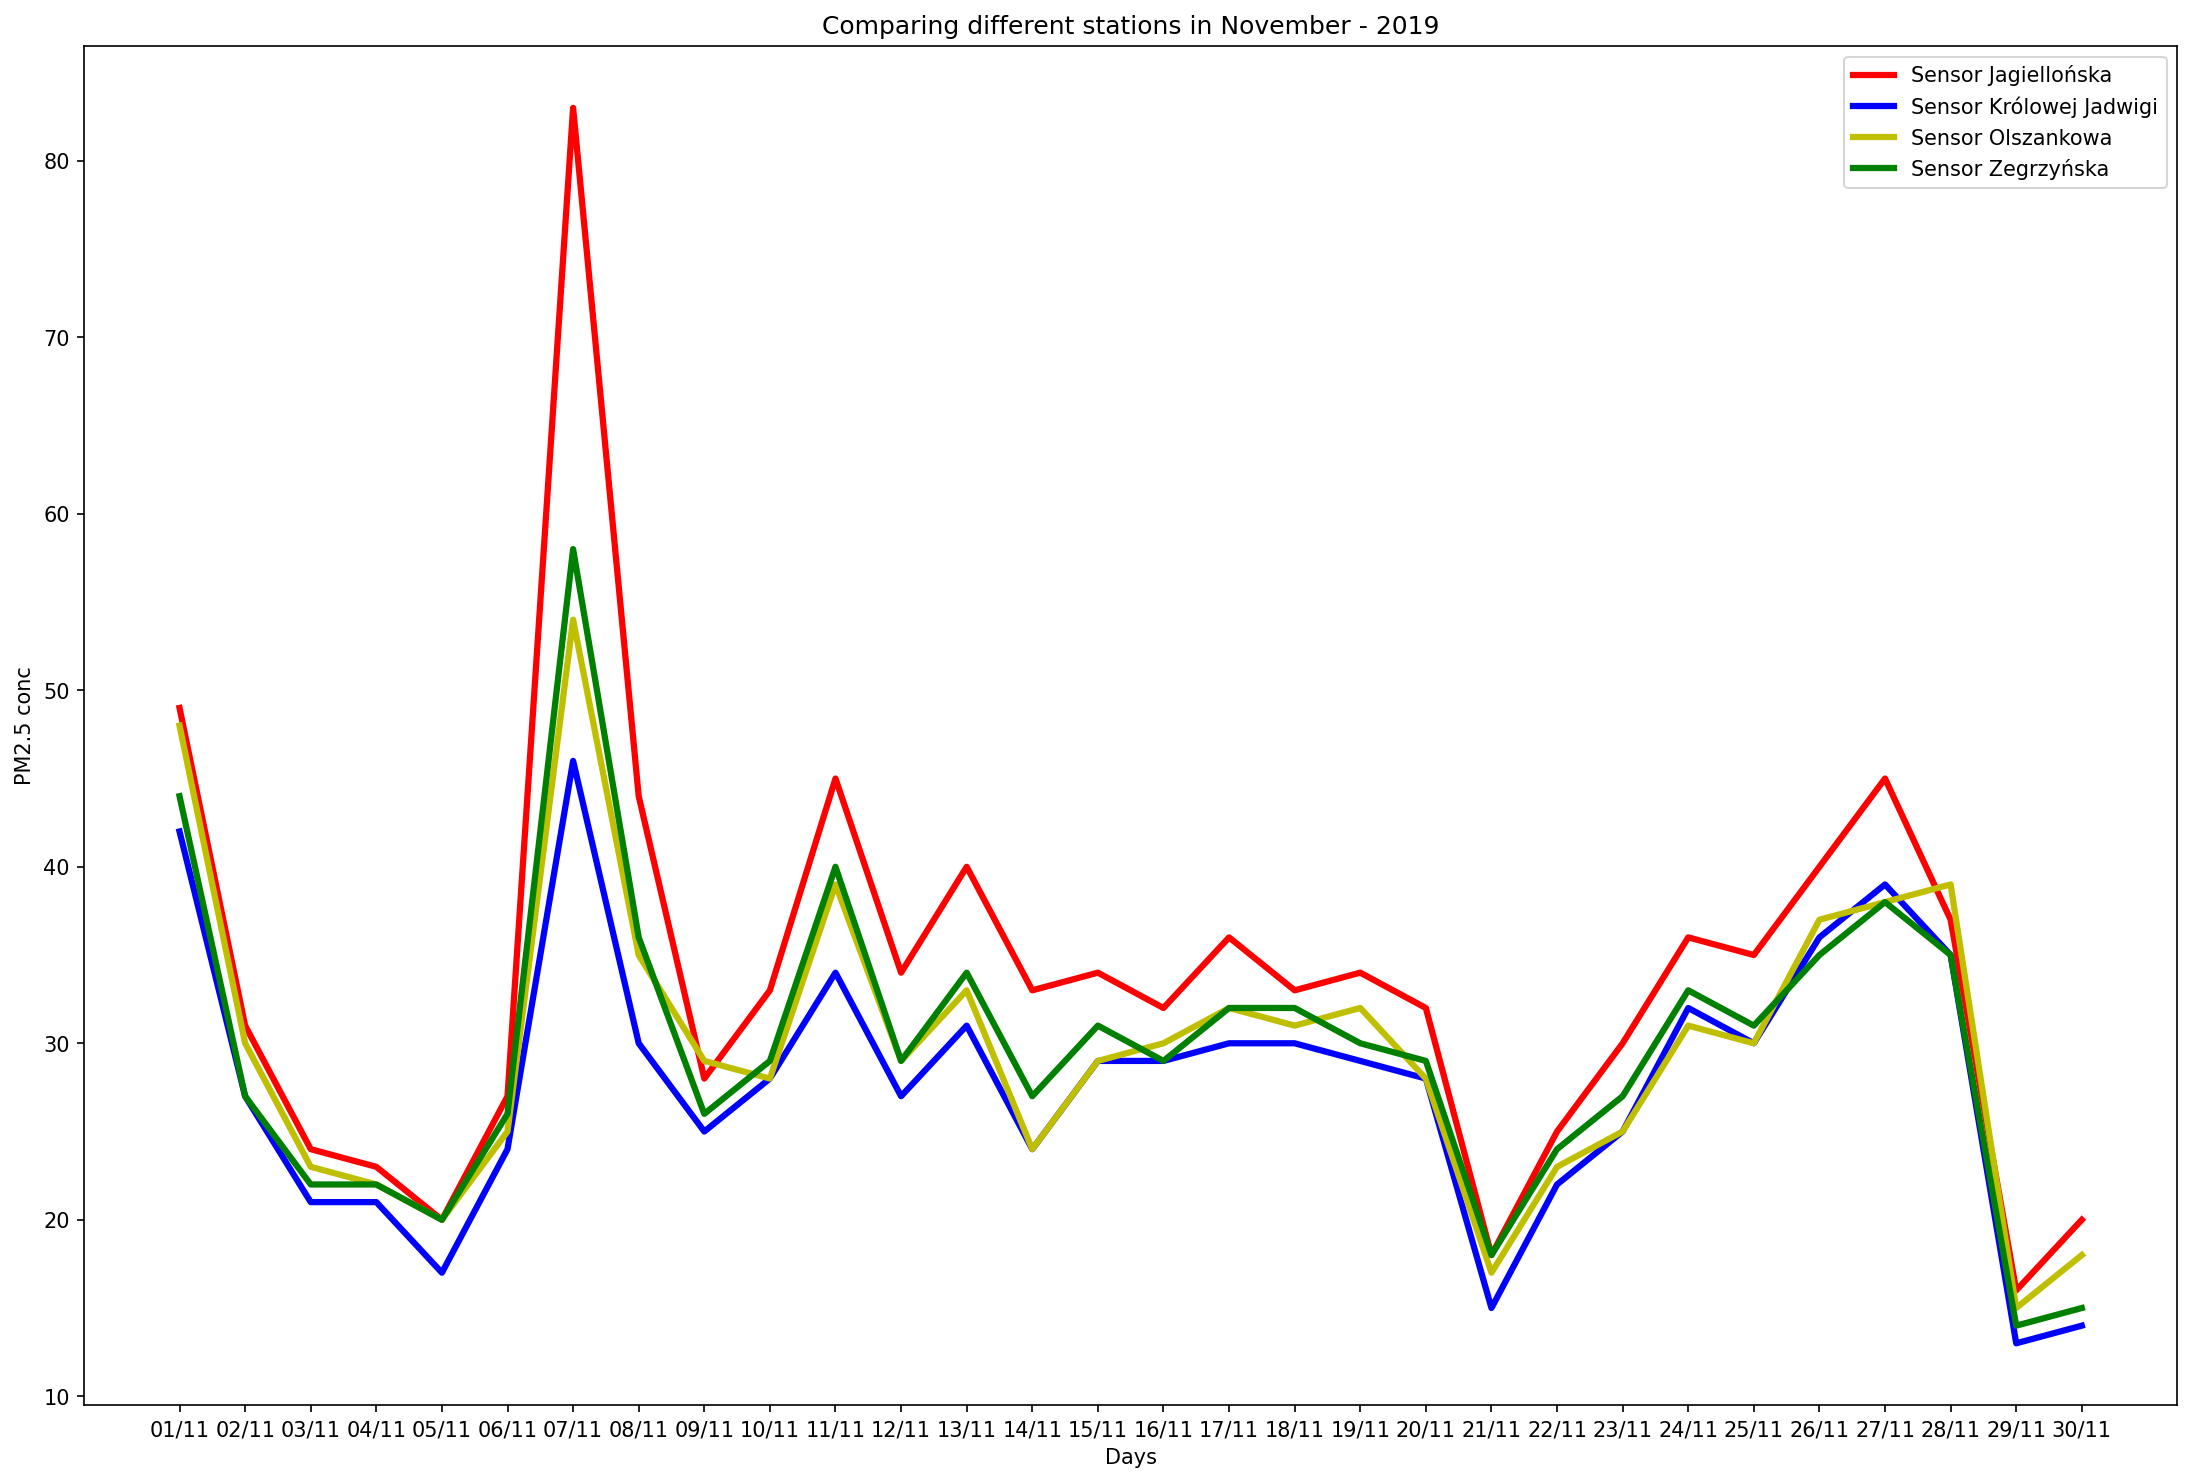

In [15]:
novdate1x = []
for x in Date1x:
    if x[3:5] == "11":
        novdate1x.append(x)
print(novdate1x)

pm1nov = []
for x in range(304,334):
    pm1nov.append(PM1[x])
print(pm1nov)

pm2nov = []
for x in range(304,334):
    pm2nov.append(PM2[x])
print(pm2nov)

pm3nov = []
for x in range(304,334):
    pm3nov.append(PM3[x])
print(pm3nov)

pm4nov = []
for x in range(304,334):
    pm4nov.append(PM4[x])
print(pm4nov)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(18, 12), dpi=150)

plt.plot(novdate1x,pm1nov, color ='r', label ='Sensor Jagiellońska', linewidth=3)
plt.plot(novdate1x,pm2nov, color = 'b', label = 'Sensor Królowej Jadwigi', linewidth=3)
plt.plot(novdate1x,pm3nov, color = 'y', label = 'Sensor Olszankowa', linewidth=3)
plt.plot(novdate1x,pm4nov, color = 'g', label = 'Sensor Zegrzyńska', linewidth=3)

plt.xlabel('Days')
plt.ylabel('PM2.5 conc')
plt.title('Comparing different stations in November - 2019')

plt.legend()
plt.show()

['01/12', '02/12', '03/12', '04/12', '05/12', '06/12', '07/12', '08/12', '09/12', '10/12', '11/12', '12/12', '13/12', '14/12', '15/12', '16/12', '17/12', '18/12', '19/12', '20/12', '21/12', '22/12', '23/12', '24/12', '25/12', '26/12', '27/12', '28/12', '29/12', '30/12', '31/12']
[49, 41, 33, 40, 39, 41, 28, 17, 24, 28, 52, 55, 37, 34, 16, 30, 49, 33, 69, 40, 46, 30, 29, 26, 38, 29, 17, 8, 22, 32, 16]
[40, 34, 26, 34, 35, 37, 24, 14, 21, 19, 39, 43, 31, 30, 13, 25, 41, 26, 48, 36, 34, 23, 24, 20, 31, 21, 15, 7, 18, 28, 11]
[51, 36, 28, 35, 37, 38, 26, 16, 24, 23, 44, 52, 33, 32, 17, 30, 49, 30, 52, 36, 36, 24, 23, 20, 28, 22, 13, 6, 21, 29, 12]
[43, 35, 26, 34, 36, 38, 24, 16, 23, 21, 41, 46, 32, 28, 14, 27, 45, 29, 56, 34, 39, 25, 25, 21, 31, 24, 15, 6, 19, 29, 13]


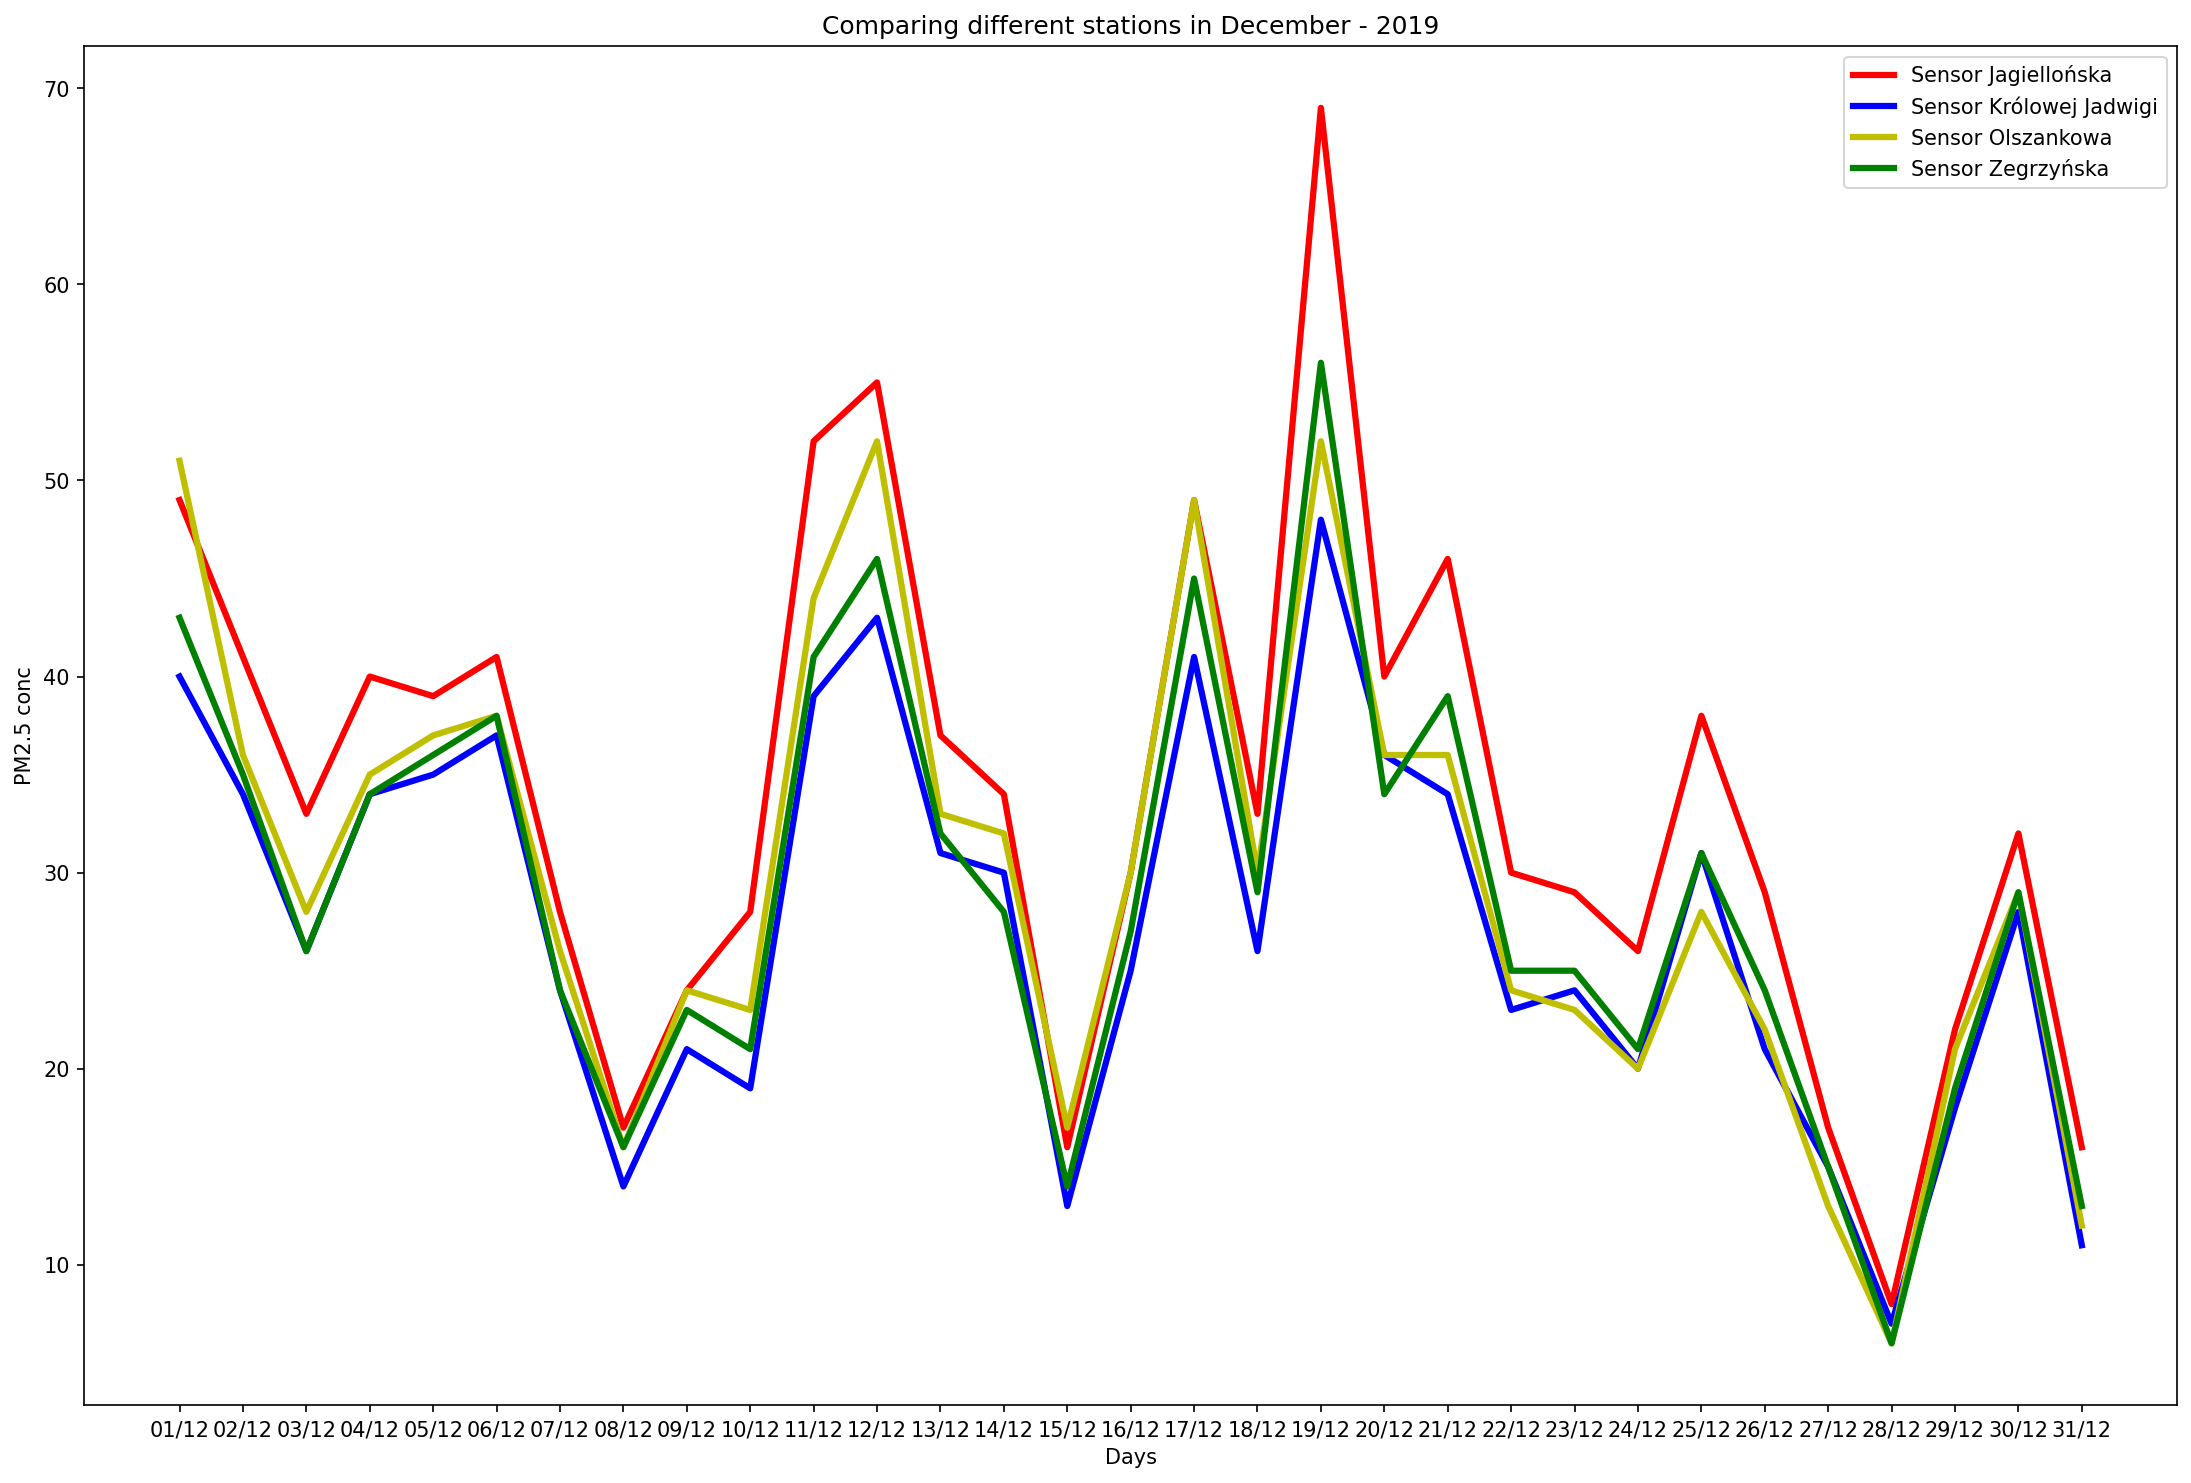

In [16]:
decdate1x = []
for x in Date1x:
    if x[3:5] == "12":
        decdate1x.append(x)
print(decdate1x)

pm1dec = []
for x in range(334,365):
    pm1dec.append(PM1[x])
print(pm1dec)

pm2dec = []
for x in range(334,365):
    pm2dec.append(PM2[x])
print(pm2dec)

pm3dec = []
for x in range(334,365):
    pm3dec.append(PM3[x])
print(pm3dec)

pm4dec = []
for x in range(334,365):
    pm4dec.append(PM4[x])
print(pm4dec)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(18, 12), dpi=150)

plt.plot(decdate1x,pm1dec, color ='r', label ='Sensor Jagiellońska', linewidth=3)
plt.plot(decdate1x,pm2dec, color = 'b', label = 'Sensor Królowej Jadwigi', linewidth=3)
plt.plot(decdate1x,pm3dec, color = 'y', label = 'Sensor Olszankowa', linewidth=3)
plt.plot(decdate1x,pm4dec, color = 'g', label = 'Sensor Zegrzyńska', linewidth=3)

plt.xlabel('Days')
plt.ylabel('PM2.5 conc')
plt.title('Comparing different stations in December - 2019')

plt.legend()
plt.show()